<center><h1 style = "font-family:Impact;color:black;font-weight:bold">  Travel Package Purchase Prediction -Ensemble Techniques</h1></center>

### Ensemble Methods

- Ensemble is a group of estimators that are used together for prediction in classification as well as regression problems.
- Ensemble is the belief that a committee of experts working together are more likely to be accurate than individual experts.
- Ensemble method uses n number of base estimators and combines their output to give a final prediction giving better performance and robustness than a single estimator.
- For ensemble to be effective we have to ensure
    - The base estimators are as different from each other as possible.
    - The errors made by each estimator should be different from each other (independent errors)

Bagging and Boosting are two ensemble methods.


Bagging |Boosting |
-----|-----|
All the weak learners are built in parallel i.e. independent of each other|Successive weak learners to improve the accuracy from the prior learners|
Each weak learner has equal weight in the final prediction.|More weight to those weak learners with better performance|
Samples are drawn from the original dataset with replacement to train each individual weak learner|Subsequent samples have more of those observations which had relatively higher errors in previous weak learners|
Can help  reduce variance of the mode|Can help  reduce bias of the mode|
Example: Bagging Classifier, Random Forest|Example: AdaBoost, Gradient Boosting Classifier


<h2 style = "font-family:Impact;color:black;font-weight:bold">Table of Contents</h2>

- [Context](#Context)
- [Data Dictionary](#Data-Dictionary)
- [Problem](#Problem)
- [Libraries](#Libraries)
- [Read and Understand Data](#Read-and-Understand-data)
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate and Multivariate Analysis](#Bivariate-&-Multivariate-Analysis)
- [Missing value Detection and Treatment](#Missing-value-Detection-and-Treatment)   
- [Insights based on EDA](#Insights-based-on-EDA)
- [Outlier Detection](#Outlier-Detection)
- [Model Building Bagging](#Model-Building-Bagging)
   - [Decision Tree](#Decsion-Tree)
   - [Bagging classifier](#Bagging-Classifier)
   - [Random Forest](#Random-Forest)
- [Model Building Boosting](#Model-Building-Boosting)
   - [Adaboost](#Adaboost)
   - [Gradient Boost](#Gradient-Boost)
   - [XGBoost](#XgBoost)
   - [Stacking Classifier](#Stacking-Classifier)
- [Conclusion](#Conclusion)
- [Business Recommendations & Insights](#Business-Recommendations-&-Insights)
- [Misclassfication Analysis](#Misclassification-Analysis)
</p>



<h3 style = "font-family:Impact;color:black;font-weight:bold">Context</h3>

"Visit with us". company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King.
Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking
at the available information.The company is now planning to launch a new product i.e. Wellness Tourism Package.
Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle,
and support or increase one's sense of well-being.However, this time company wants to harness the available data
of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team
and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

**Motivation of the book is to understand how to implement Bagging, Boosting and  How to tune Model using Hyperparmeters**

<h2 style = "font-family:Impact;color:black;font-weight:bold">Data Dictionary</h2>

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

Customer interaction data:

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

<h2 style = "font-family:Impact;color:black;font-weight:bold">Problem</h2>

- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.



[Top](#Table-of-Contents)

<h3 style = "font-family:Impact;color:black;font-weight:bold">Libraries</h3>  

In [ ]:
#To install xgboost library use -
!pip install xgboost
### IMPORT: ------------------------------------
import scipy.stats as stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#plot_confusion_matrix #to plot confusion matric

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x)
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
!!pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport

print('Load Libraries-Done')
!!pip install xlrd
#!!pip install openpyxl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3 style = "font-family:Impact;color:black;font-weight:bold">Read and Understand data</h3>  

In [3]:
#Reading the Excel file  used tourism.xlsx
data_path='/content/drive/My Drive/project/Tourism.xlsx'

#Loading the dataset - sheet_name parameter is used if there are tabs in the excel file
df=pd.read_excel(data_path,sheet_name='Tourism')
#df=pd.read_excel(data_path)
#df=pd.read_csv(data_path)

df_tour=df.copy()
print(f'There are {df_tour.shape[0]} rows and {df_tour.shape[1]} columns') # fstring

There are 4888 rows and 20 columns


#### View the first and last 5 rows of the dataset.

In [4]:
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000


In [5]:
df_tour.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.00000,Self Enquiry,3,9.00000,Small Business,Male,3,5.00000,Deluxe,4.00000,Unmarried,2.00000,1,1,1,1.00000,Manager,26576.00000
4884,204884,1,28.00000,Company Invited,1,31.00000,Salaried,Male,4,5.00000,Basic,3.00000,Single,3.00000,1,3,1,2.00000,Executive,21212.00000
4885,204885,1,52.00000,Self Enquiry,3,17.00000,Salaried,Female,4,4.00000,Standard,4.00000,Married,7.00000,0,1,1,3.00000,Senior Manager,31820.00000
4886,204886,1,19.00000,Self Enquiry,3,16.00000,Small Business,Male,3,4.00000,Basic,3.00000,Single,3.00000,0,5,0,2.00000,Executive,20289.00000
4887,204887,1,36.00000,Self Enquiry,1,14.00000,Salaried,Male,4,4.00000,Basic,4.00000,Unmarried,3.00000,1,3,1,2.00000,Executive,24041.00000


#### Understand the  dataset.

In [6]:
#get the size of dataframe
print ("Rows     : " , df_tour.shape[0])  #get number of rows/observations
print ("Columns  : " , df_tour.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_tour.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df_tour.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df_tour.isna().sum() / df_tour.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values


Rows     :  4888
Columns  :  20
######################################## 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0

#### Check the data types of the columns for the dataset.

In [7]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations**
- There are lot of missing values.
- 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further
- 4.77% values are missig from MonthlyIncome.
- Age has 4.62 % missing values.
- NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values
- ProdTaken is the Target Variable
- Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.

#### Summary of the dataset.

In [8]:
df_tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.00000,202443.50000,1411.18839,200000.00000,201221.75000,202443.50000,203665.25000,204887.00000
ProdTaken,4888.00000,0.18822,0.39092,0.00000,0.00000,0.00000,0.00000,1.00000
Age,4662.00000,37.62227,9.31639,18.00000,31.00000,36.00000,44.00000,61.00000
CityTier,4888.00000,1.65426,0.91658,1.00000,1.00000,1.00000,3.00000,3.00000
DurationOfPitch,4637.00000,15.49083,8.51964,5.00000,9.00000,13.00000,20.00000,127.00000
NumberOfPersonVisiting,4888.00000,2.90507,0.72489,1.00000,2.00000,3.00000,3.00000,5.00000
NumberOfFollowups,4843.00000,3.70845,1.00251,1.00000,3.00000,4.00000,4.00000,6.00000
PreferredPropertyStar,4862.00000,3.58104,0.79801,3.00000,3.00000,3.00000,4.00000,5.00000
NumberOfTrips,4748.00000,3.23652,1.84902,1.00000,2.00000,3.00000,4.00000,22.00000
Passport,4888.00000,0.29092,0.45423,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations**
- Minimum age  of customer is `18` and Maximum age is `61` with mean of `37`.
- Mean Duration of pitch  is `15` mins to max of `127` mins.
- Mean Number of trips is `3` with maximum of `22`.This needs to be verified
- `Average monthly income` of customer is `23619` with maximum of `98678`. This needs to be verified
- `920` customer had taken package last time.


[Top](#Table-of-Contents)

<h3 style = "font-family:Impact;color:black;font-weight:bold"> Data Preprocessing</h3>  

#### Droping customer id

In [9]:
df_tour.drop(['CustomerID'],axis=1,inplace=True)

In [10]:

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [11]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df_tour[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are :

- `Single` and `unmarried` status are not same category . Unmarried here means customers having partners.
- `Female` and `Fe male` are same category , Data needs to be fixed
- 3 star property is prefered by customers
- Most of the customers are from Tier1 cities

#### Processing Gender status.
Female and Fe male are two category in dataset , fixing it to Female

In [12]:
df_tour.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [13]:
df_tour['Gender'] = df_tour['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [14]:
df_tour.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [15]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
df_tour[cat_cols] = df_tour[cat_cols].astype('category')
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [16]:
df_tour.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


#### Age

Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [17]:
df_tour.Age.describe()

count   4662.00000
mean      37.62227
std        9.31639
min       18.00000
25%       31.00000
50%       36.00000
75%       44.00000
max       61.00000
Name: Age, dtype: float64

In [18]:
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [19]:
df_tour.Agebin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

### Income
To understand customers segments derving new columns which will help us identify if customer in different income range

In [20]:
df_tour.MonthlyIncome.describe()

count    4655.00000
mean    23619.85349
std      5380.69836
min      1000.00000
25%     20346.00000
50%     22347.00000
75%     25571.00000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [21]:
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [22]:
df_tour.Incomebin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Exploratory Data Analysis</h2>

### Univariate Analysis

In [23]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


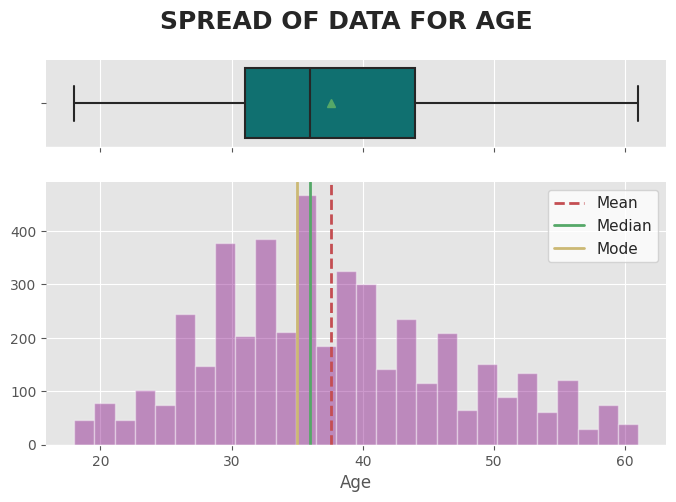

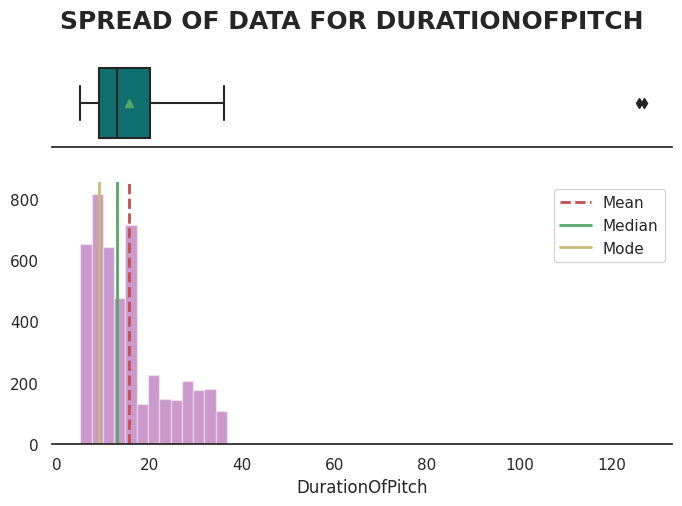

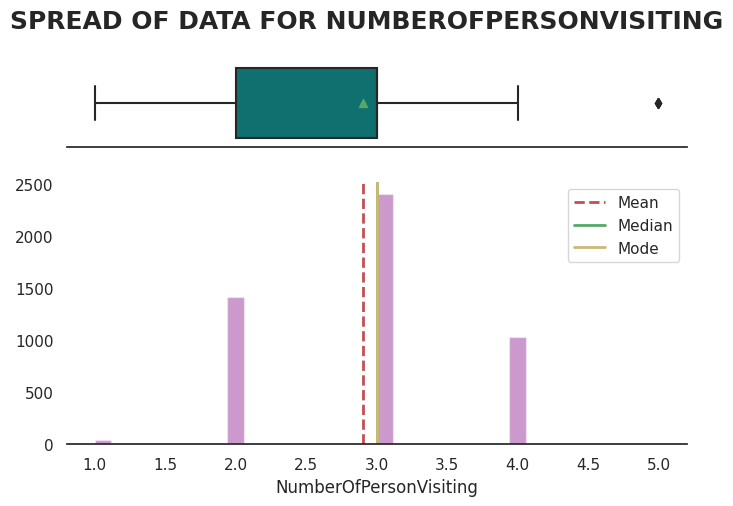

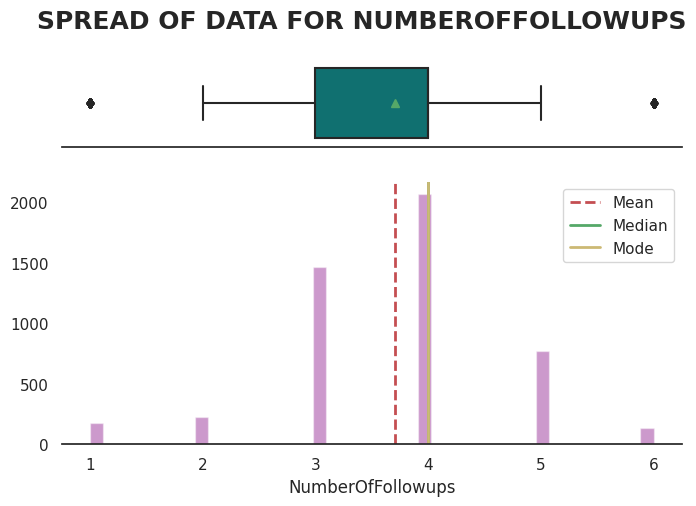

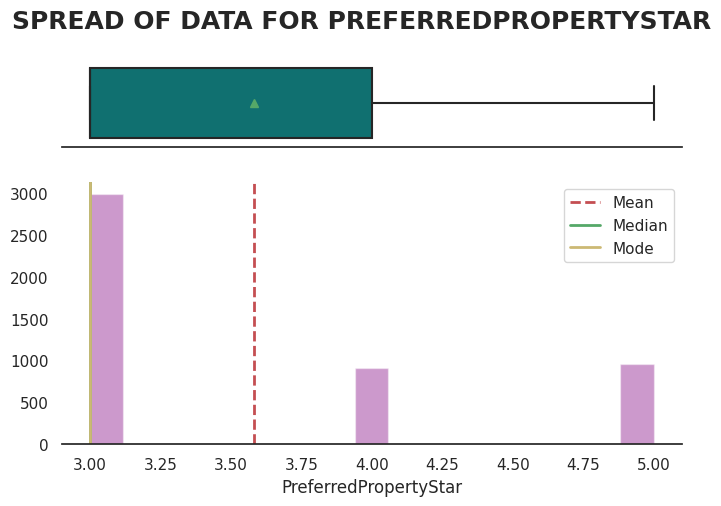

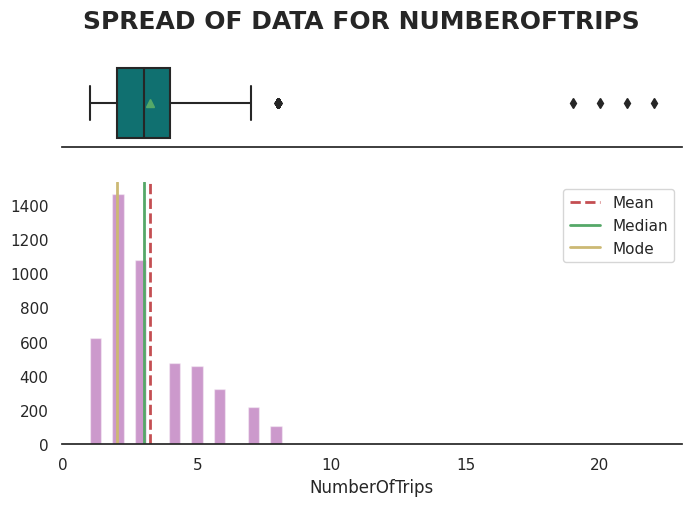

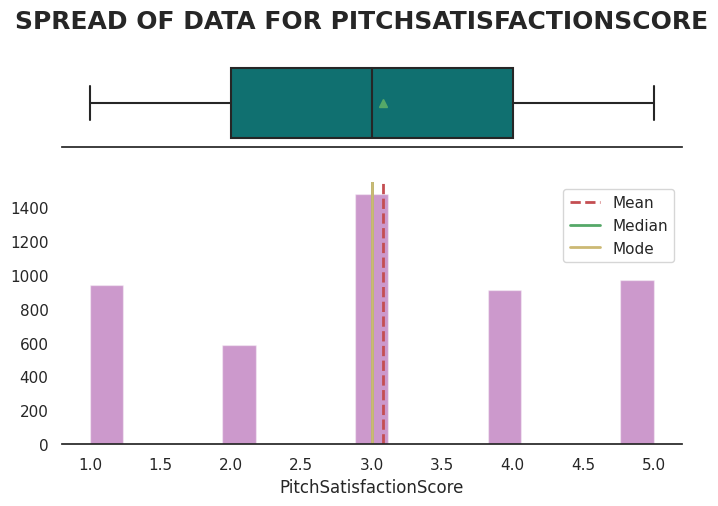

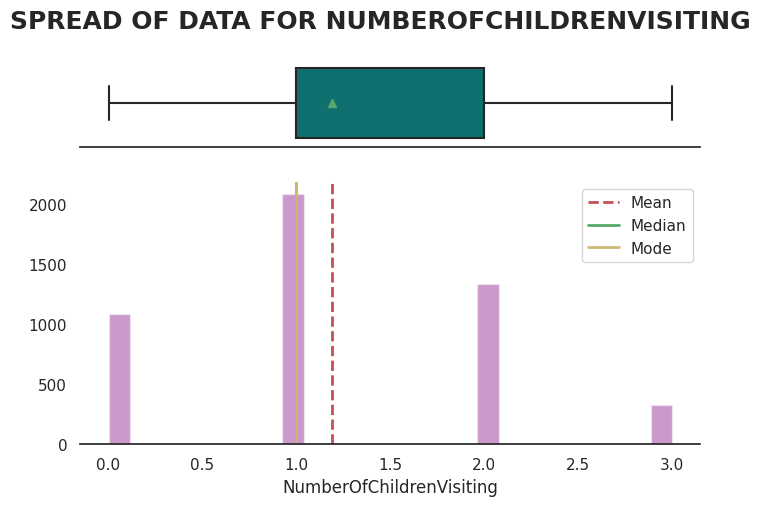

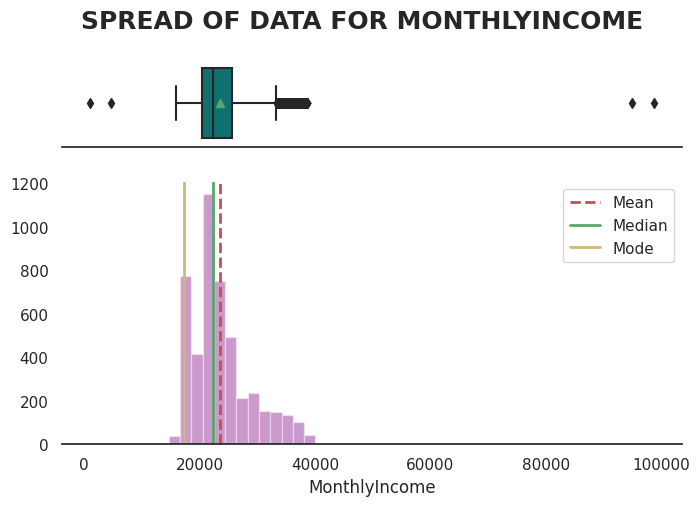

In [24]:
#select all quantitative columns for checking the spread
list_col=  df_tour.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_tour[list_col[i]])

**Observations**
- Age is normally distrubted  and doesn't have any outliers
- Duration of pitch is Right skewed with some outliers  greater than 120 .Need to see if this are to be treated.
- Number of visitors is usually 3 with a outlier of 5.
- Average number of folows up are 4 with extreme of 6
- Number of trips is right skewed with some outliers where trips are greater than 17.
- Monthly income is Right skewed. and has some outlier as higher end.


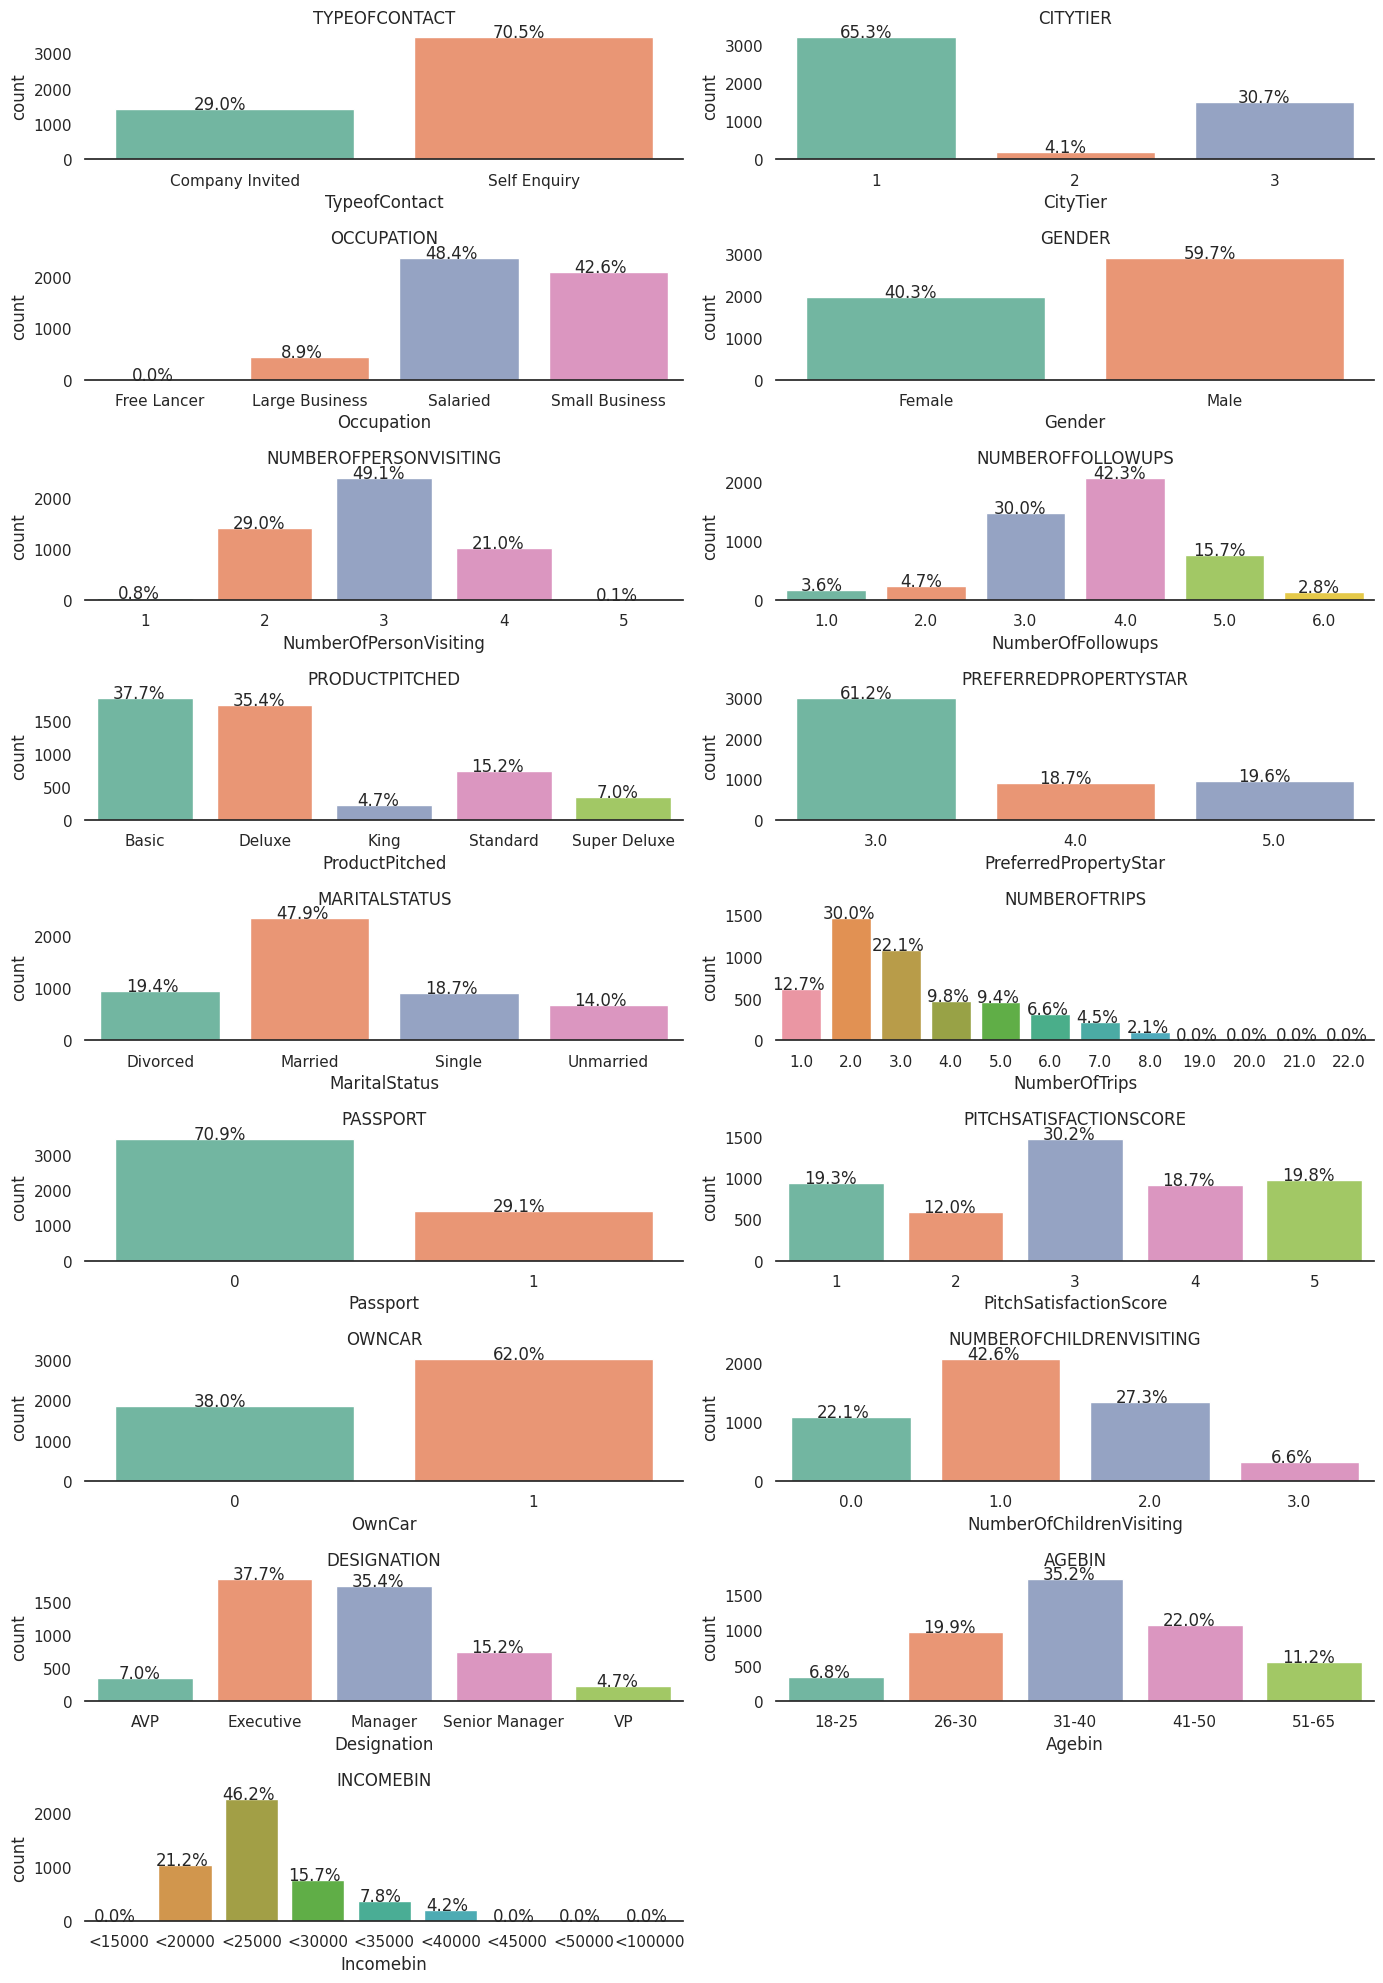

In [25]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white")
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting',
        'Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df_tour[variable].value_counts(ascending=False).index
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_tour[variable], data=df_tour )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_tour[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())



**Observations**
- ~38 % customers are Executive, followed by 35% are managers.
- ~18% customers accepted product offered last time.
- ~ 62 % customer own car.
- ~29 % customers has a passport.
- ~ 65 % customers are from Tier 1 cities.
- ~ 61 % customers prefer 3 star property.
- ~ 48 % customers are married
- Basic package was pitched to ~ 38 % of customers and 35 % were pitched Deluxe package.
- 60 % customers are male.
- Occupation of ~ 49 % customer is  salaried.
- 70.5 % customer  self enquiried for the packages.
- Most of the customers travelled along with 3 people.
- Most of the customers take 2 trips per year but as seen previously there are some extreme values like 22.
- Most of the customers travelled with  only one child.
- Most of the customers were followed up 4 times.
- Majority  of customer monthly income is in 20000-25000 range.Most customer fall in 15000-30000 monthly income range.
- ~35% are in 31-40 Age group.  Most customer are in 26-50 age range

### Bivariate & Multivariate Analysis

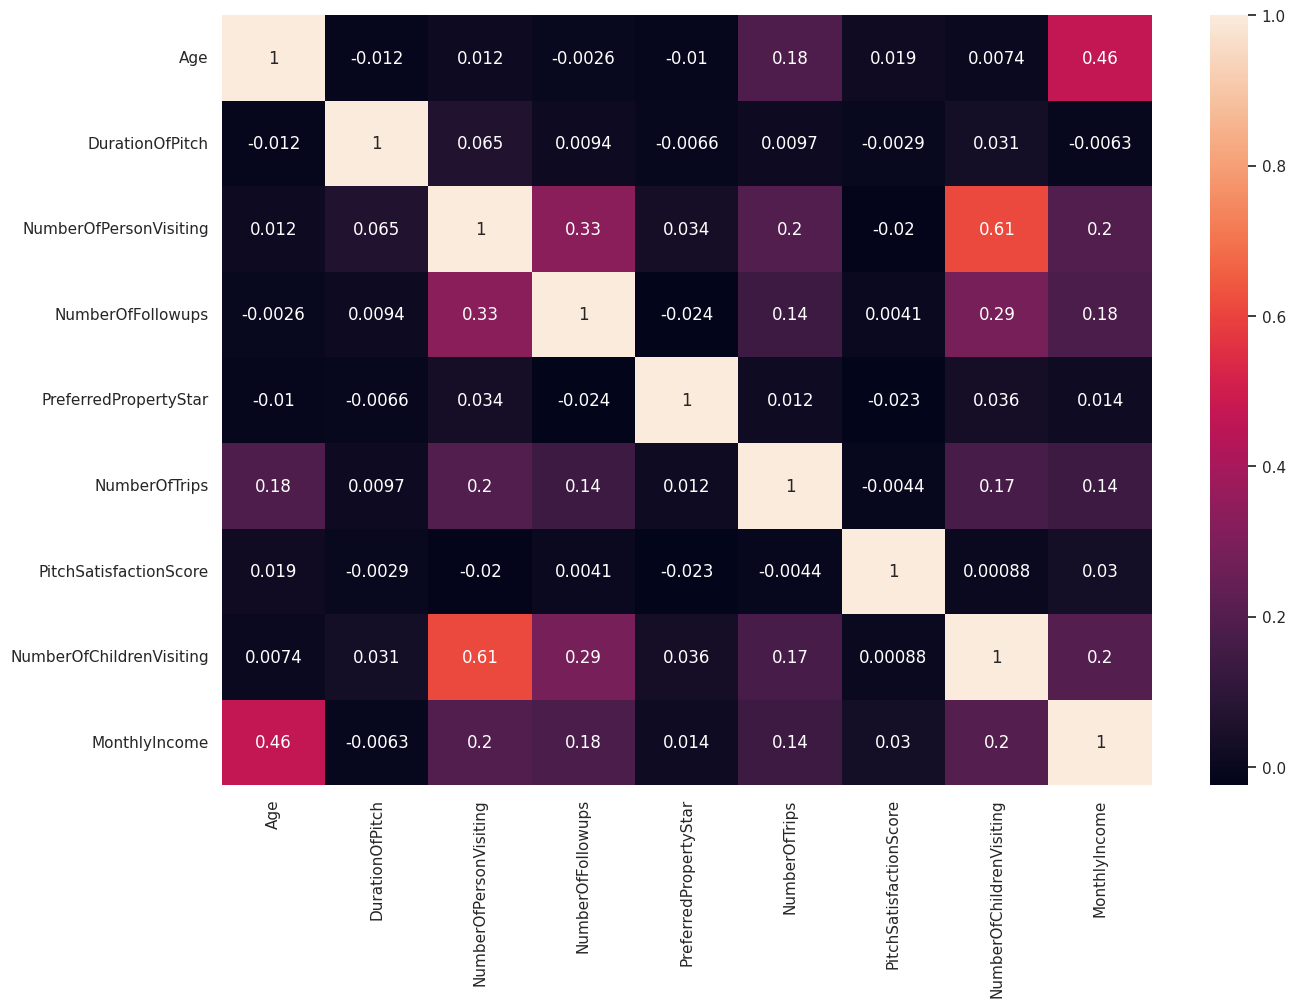

In [26]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_tour.corr(),annot=True)
plt.show()

In [27]:
#sns.set_palette(sns.color_palette("Set1", 8))
#sns.pairplot(df_tour, hue="ProdTaken",corner=True)
#plt.show()

**Observations**
- Monthlyincome and Age has weak correlation
- Number of children visiting and number of person vsiting has correlation as expected.
- Numberof follow up and number of person vsiting has very weak correlation.
-

In [28]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(df_tour[(df_tour[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(df_tour[(df_tour[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')

    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)

    sns.boxplot(df_tour[target],df_tour[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df_tour[target],df_tour[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

In [29]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
#list_col= df_tour.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
#for j in range(len(list_col)):
 #  plot(list_col[j])


In [30]:
df_tour


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
0,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,...,Single,1.00000,1,2,1,0.00000,Manager,20993.00000,41-50,<25000
1,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,...,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000,41-50,<25000
2,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,...,Single,7.00000,1,3,0,0.00000,Executive,17090.00000,31-40,<20000
3,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,...,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000,31-40,<20000
4,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,...,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000,NaN,<20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.00000,Self Enquiry,3,9.00000,Small Business,Male,3,5.00000,Deluxe,...,Unmarried,2.00000,1,1,1,1.00000,Manager,26576.00000,41-50,<30000
4884,1,28.00000,Company Invited,1,31.00000,Salaried,Male,4,5.00000,Basic,...,Single,3.00000,1,3,1,2.00000,Executive,21212.00000,26-30,<25000
4885,1,52.00000,Self Enquiry,3,17.00000,Salaried,Female,4,4.00000,Standard,...,Married,7.00000,0,1,1,3.00000,Senior Manager,31820.00000,51-65,<35000
4886,1,19.00000,Self Enquiry,3,16.00000,Small Business,Male,3,4.00000,Basic,...,Single,3.00000,0,5,0,2.00000,Executive,20289.00000,18-25,<25000


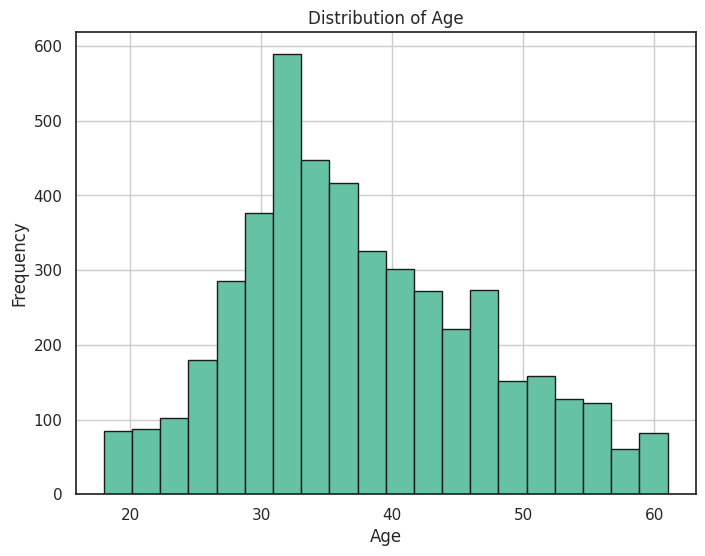

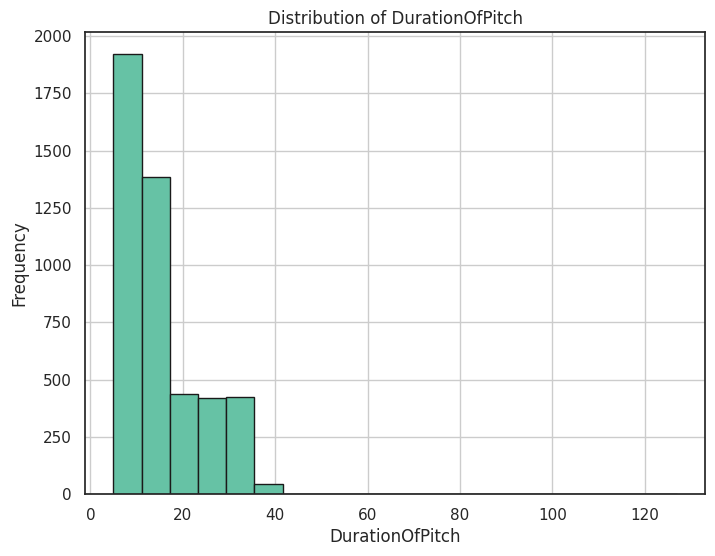

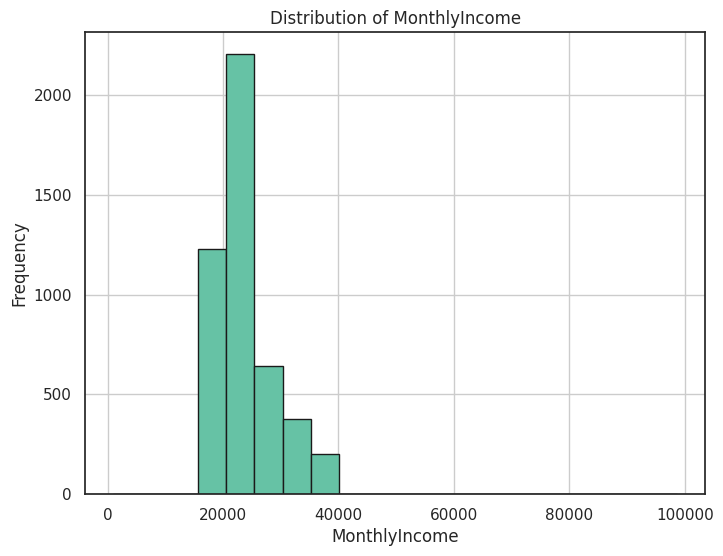

In [31]:
import matplotlib.pyplot as plt
list_col = ['Age', 'DurationOfPitch', 'MonthlyIncome']

for col in list_col:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.hist(df_tour[col], bins=20, edgecolor='k')  # Example: Using a histogram for visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Observation**
- Customers who purchased the product are mostly in age range of 28 -35
- Duration of pitch suprisingly for customer who purchased product where 10- 40 min. There are some outliers in duration of pitch for customers who didn't take the product
- Number of trips has some outliers like 17 -20.
- Monthly income has extreme outliers.Customers who purchased product are in earning on average 18000-23000 monthly


In [32]:
#sns.set_palette(sns.color_palette("nipy_spectral", 8))
#sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=df_tour)
#sns.despine(top=True,right=True,left=True) # to remove side line from graph
#plt.title('Monthly Income vs Age')


<h2 style = "font-family:Impact;color:black;font-weight:bold">Missing value Detection and Treatment</h2>

In [33]:
df_tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

#### Missing value Treatment Type of contact

In [34]:
df_tour['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Highest ocurring value is `Self Inquiry`. We will impute the missing value for TypeofContact using the mode(highest occuring value) of the feature.

In [35]:
df_tour['TypeofContact'].mode()

df_tour['TypeofContact']=df_tour['TypeofContact'].fillna('Self Enquiry')

In [36]:
#Verify if there are null values
df_tour["TypeofContact"].isnull().sum()

0

#### Missing value Treatment number of followup.

In [37]:
df_tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

df_tour['NumberOfFollowups']=df_tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

#### Missing value Treatment PreferredPropertyStar

In [38]:
#Look at few rows where values  is missing
df_tour[df_tour["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
38,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,Basic,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
2609,0,51.00000,Self Enquiry,1,18.00000,Salaried,Female,3,4.00000,King,...,Single,5.00000,0,5,1,1.00000,VP,38604.00000,51-65,<40000
2634,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,King,...,Divorced,2.00000,0,2,1,2.00000,VP,38677.00000,51-65,<40000
3012,1,56.00000,Self Enquiry,1,9.00000,Small Business,Male,4,4.00000,King,...,Divorced,7.00000,1,2,1,3.00000,VP,38537.00000,51-65,<40000
3190,0,42.00000,Company Invited,1,14.00000,Salaried,Female,3,6.00000,King,...,Married,3.00000,0,4,1,1.00000,VP,38651.00000,41-50,<40000
3193,1,53.00000,Self Enquiry,3,9.00000,Small Business,Female,3,6.00000,King,...,Divorced,3.00000,0,3,1,1.00000,VP,38523.00000,51-65,<40000
3214,0,47.00000,Self Enquiry,1,7.00000,Small Business,Male,3,4.00000,King,...,Married,2.00000,0,5,1,2.00000,VP,38305.00000,41-50,<40000
3295,0,57.00000,Self Enquiry,1,11.00000,Large Business,Female,4,4.00000,King,...,Married,6.00000,0,4,0,3.00000,VP,38621.00000,51-65,<40000
3342,0,44.00000,Self Enquiry,1,10.00000,Salaried,Male,4,6.00000,King,...,Divorced,5.00000,0,5,1,3.00000,VP,38418.00000,41-50,<40000
3362,0,52.00000,Company Invited,3,16.00000,Salaried,Male,3,4.00000,King,...,Married,6.00000,1,4,1,2.00000,VP,38525.00000,51-65,<40000


Let see how can impute PreferredPropertyStar using  designation  of customer for more granularity

In [39]:
df_tour['PreferredPropertyStar']=df_tour.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

df_tour[df_tour["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


#### Missing value Treatment Duration of pitch

Let see how can we impute Duration of pitch.In my opinion an important factor for how long sale person take times to market his sales pitch depends on Product which sale person is proposing , number of followup will also decide duration of pitch. Let verify this.

In [40]:
df_tour.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
df_tour["DurationOfPitch"] = df_tour.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

In [41]:
df_tour[df_tour["DurationOfPitch"].isnull()]

df_tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

#### Missing value Treatment for NumberOfTrips

In [42]:
df_tour.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced    3.00000
Married     3.00000
Single      2.00000
Unmarried   3.00000
Name: NumberOfTrips, dtype: float64

For more granularity imputing number of trips using martial status

In [43]:
# Impute missing NumberOfTrips of pitch with median value
df_tour["NumberOfTrips"] = df_tour.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

#### Missing value Treatment NumberOfChildrenVisiting

In [44]:
df_tour[df_tour["NumberOfChildrenVisiting"].isnull()].head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
165,0,50.00000,Self Enquiry,1,17.00000,Salaried,Female,2,3.00000,King,...,Single,4.00000,0,5,1,NaN,VP,34926.00000,41-50,<35000
190,0,52.00000,Self Enquiry,1,6.00000,Salaried,Male,3,4.00000,King,...,Divorced,1.00000,0,2,1,NaN,VP,34999.00000,51-65,<35000
568,1,55.00000,Self Enquiry,1,8.00000,Small Business,Male,3,3.00000,King,...,Divorced,6.00000,1,2,1,NaN,VP,34859.00000,51-65,<35000
746,0,41.00000,Company Invited,1,13.00000,Salaried,Female,2,5.00000,King,...,Married,2.00000,0,4,1,NaN,VP,34973.00000,41-50,<35000
749,1,52.00000,Self Enquiry,3,8.00000,Small Business,Female,2,5.00000,King,...,Divorced,2.00000,0,3,1,NaN,VP,34845.00000,51-65,<35000
851,0,56.00000,Self Enquiry,1,10.00000,Large Business,Female,3,3.00000,King,...,Married,5.00000,0,4,0,NaN,VP,34943.00000,51-65,<35000
898,0,43.00000,Self Enquiry,1,9.00000,Salaried,Male,3,5.00000,King,...,Divorced,4.00000,0,5,1,NaN,VP,34740.00000,41-50,<35000
918,0,51.00000,Company Invited,3,15.00000,Salaried,Male,2,3.00000,King,...,Married,5.00000,1,4,1,NaN,VP,34847.00000,51-65,<35000
956,0,56.00000,Self Enquiry,2,14.00000,Salaried,Male,2,3.00000,King,...,Single,7.00000,0,4,1,NaN,VP,34717.00000,51-65,<35000
1009,0,58.00000,Self Enquiry,1,6.00000,Small Business,Female,3,3.00000,King,...,Divorced,4.00000,1,1,1,NaN,VP,34701.00000,51-65,<35000


Assuming  children visited is missing because no children accompanied these customers so we will fill the missing values with 0

In [45]:
# Impute missing NumberOfChildrenVisited with 0
df_tour['NumberOfChildrenVisiting']=df_tour['NumberOfChildrenVisiting'].fillna(0)

#### Missing value Treatment Age

 Imputing  age using designation,gender,Martial status would give more  granularity

In [46]:
df_tour[df_tour["Age"].isnull()].head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
4,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,...,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000,NaN,<20000
11,0,NaN,Self Enquiry,1,21.00000,Salaried,Female,2,4.00000,Deluxe,...,Single,1.00000,1,3,0,0.00000,Manager,NaN,NaN,NaN
19,0,NaN,Self Enquiry,1,8.00000,Salaried,Male,2,3.00000,Basic,...,Single,6.00000,1,4,0,1.00000,Executive,NaN,NaN,NaN
20,0,NaN,Company Invited,1,17.00000,Salaried,Female,3,2.00000,Deluxe,...,Married,1.00000,0,3,1,2.00000,Manager,NaN,NaN,NaN
21,1,NaN,Self Enquiry,3,15.00000,Salaried,Male,2,4.00000,Deluxe,...,Single,1.00000,0,2,0,0.00000,Manager,18407.00000,NaN,<20000
26,1,NaN,Company Invited,1,22.00000,Salaried,Female,3,5.00000,Basic,...,Single,2.00000,1,4,1,2.00000,Executive,NaN,NaN,NaN
44,0,NaN,Company Invited,1,6.00000,Small Business,Female,2,3.00000,Deluxe,...,Single,2.00000,0,3,1,0.00000,Manager,NaN,NaN,NaN
51,1,NaN,Self Enquiry,1,11.00000,Large Business,Male,2,3.00000,Basic,...,Single,2.00000,1,2,1,0.00000,Executive,18441.00000,NaN,<20000
54,0,NaN,Self Enquiry,3,29.00000,Small Business,Female,2,4.00000,Deluxe,...,Divorced,1.00000,1,2,1,0.00000,Manager,NaN,NaN,NaN
57,0,NaN,Self Enquiry,1,29.00000,Small Business,Female,1,3.00000,Basic,...,Divorced,4.00000,1,4,1,0.00000,Executive,NaN,NaN,NaN


In [47]:
df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
df_tour["Age"] = df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

#### Missing value Treatment MonthlyIncome

For more granularity imputing on occupation,Designation,Gender

In [48]:
df_tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

Occupation      Designation     Gender
Free Lancer     AVP             Female           NaN
                                Male             NaN
                Executive       Female           NaN
                                Male     18929.00000
                Manager         Female           NaN
                                Male             NaN
                Senior Manager  Female           NaN
                                Male             NaN
                VP              Female           NaN
                                Male             NaN
Large Business  AVP             Female   31872.00000
                                Male     29959.00000
                Executive       Female   20748.00000
                                Male     20743.50000
                Manager         Female   22198.50000
                                Male     21997.00000
                Senior Manager  Female   28266.00000
                                Male     26838.50000
       

In [49]:
df_tour["MonthlyIncome"]=df_tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [50]:
df_tour.isnull().sum() #verify if all missing values have been treated

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
Agebin                      240
Incomebin                   233
dtype: int64

Finally all missing values have been treated.

#### Age

Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [51]:
df_tour.Age.describe()

count   4888.00000
mean      37.41356
std        9.16280
min       18.00000
25%       31.00000
50%       36.00000
75%       43.00000
max       61.00000
Name: Age, dtype: float64

In [52]:
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [53]:
df_tour.Agebin.value_counts()

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

### Income
To understand customers segments derving new columns which will help us identify if customer in different income range

In [54]:
df_tour.MonthlyIncome.describe()

count    4888.00000
mean    23543.85577
std      5267.65145
min      1000.00000
25%     20438.25000
50%     22393.00000
75%     25424.75000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [55]:
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [56]:
df_tour.Incomebin.value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

In [57]:
df_tour.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

## Customer Profile by Product Type

In [58]:
cust_prof=df_tour[df_tour['ProdTaken']==1]

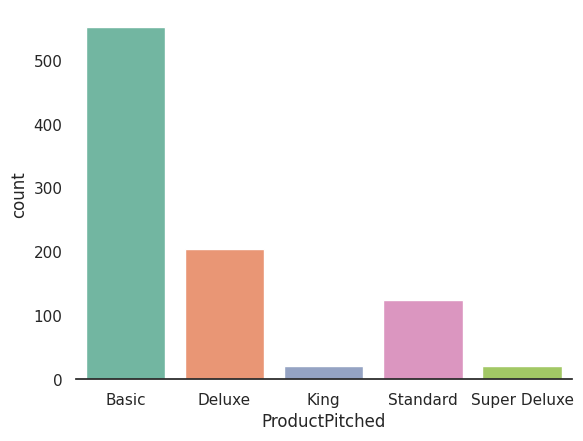

In [59]:
#plt.figure(figsize= [12,12])

sns.countplot(x="ProductPitched", data=cust_prof)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

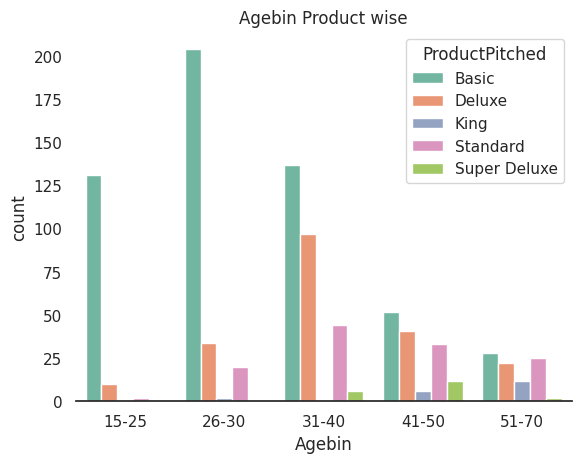

In [60]:
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')
#sns.catplot(x='Agebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count')
sns.despine(top=True,right=True,left=True) # to remove side line from graph


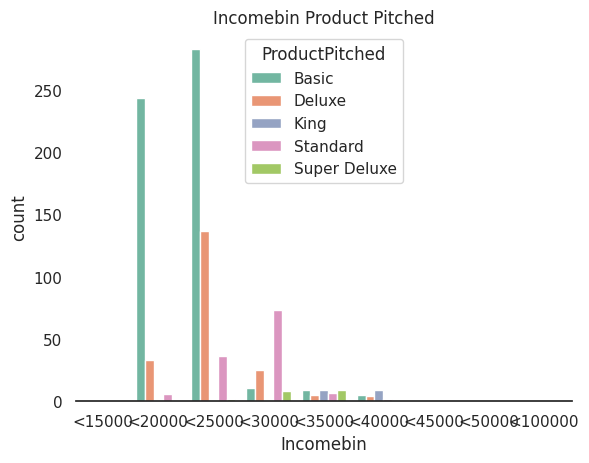

In [61]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
#sns.catplot(x='Incomebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph


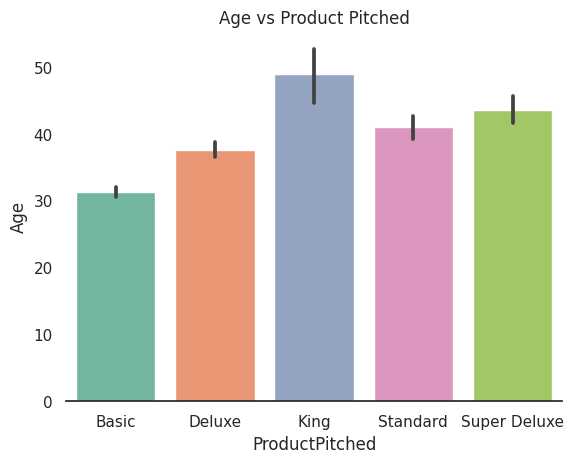

In [62]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')
#sns.catplot(y='Age',x='ProductPitched',col='ProdTaken',data=df_tour,kind='bar',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph


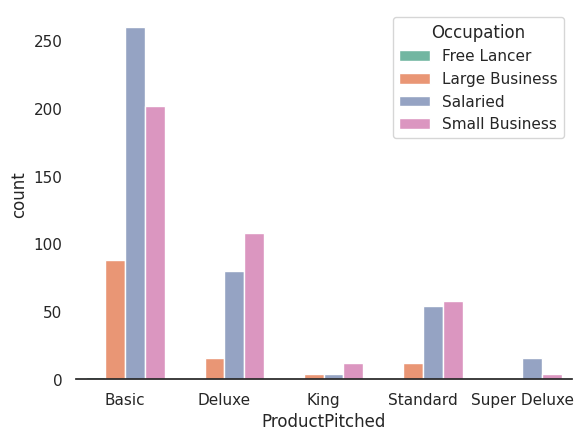

In [63]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")
#sns.catplot(hue='Occupation',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

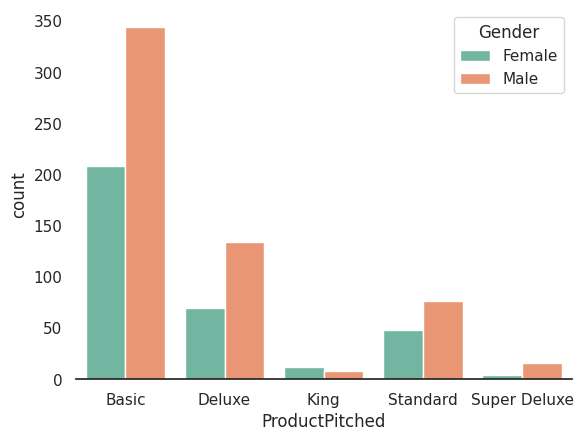

In [64]:
#sns.catplot(hue='Gender',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

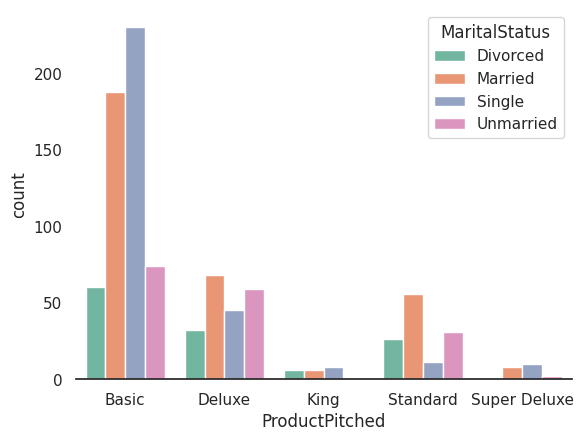

In [65]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

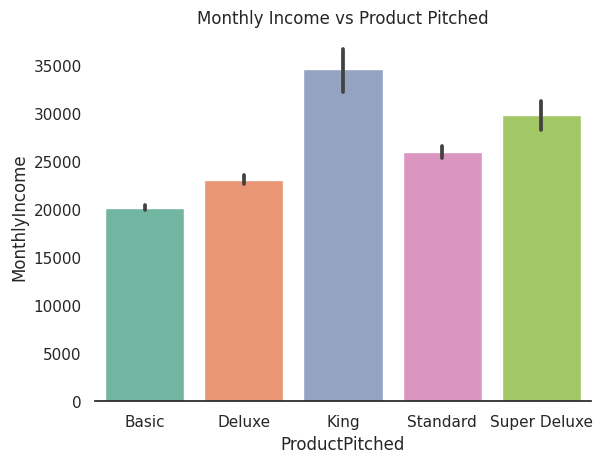

In [66]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

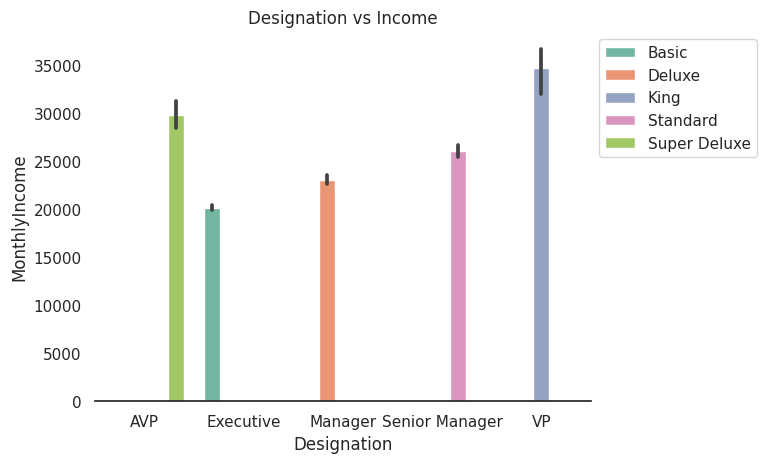

In [67]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))

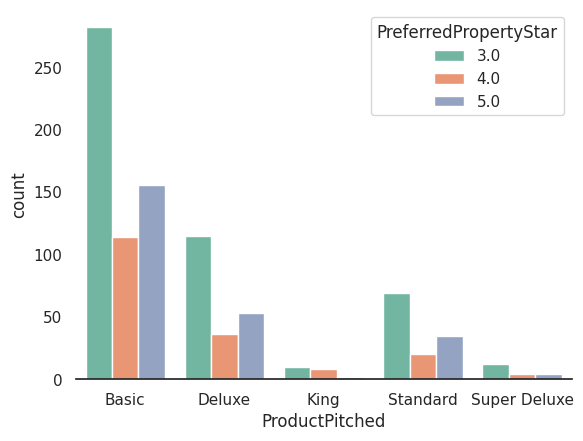

In [68]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

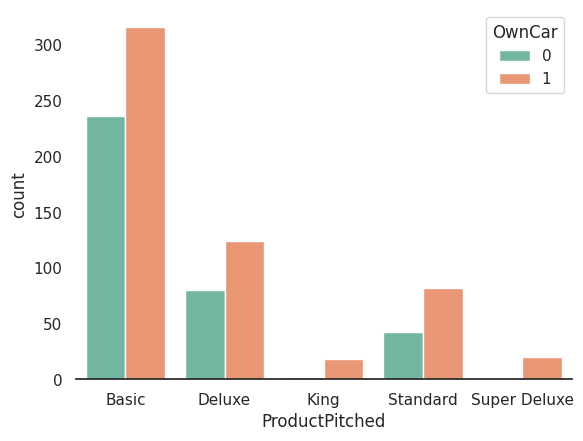

In [69]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

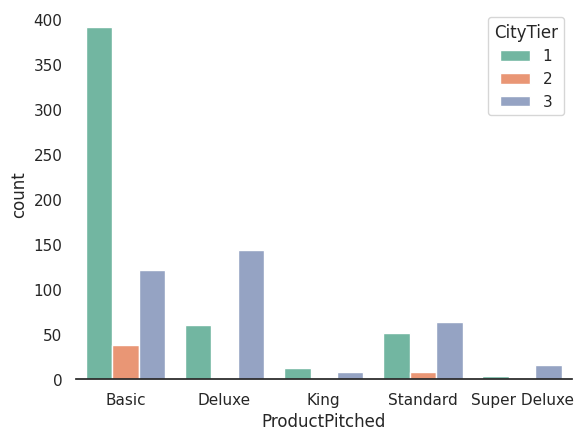

In [70]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [71]:
cust_prof.groupby(['ProductPitched']).agg({'MonthlyIncome':{'mean','min','max'},'Age':{'mean','min','max'}})

MonthlyIncome                              Age           \
                         min         max        mean      min      max   
ProductPitched                                                           
Basic            16009.00000 37868.00000 20179.10870 18.00000 59.00000   
Deluxe           17086.00000 38525.00000 23093.33333 21.00000 59.00000   
King             17517.00000 38537.00000 34672.10000 27.00000 59.00000   
Standard         17372.00000 38395.00000 26035.41935 19.00000 60.00000   
Super Deluxe     21151.00000 37502.00000 29823.80000 39.00000 56.00000   

                         
                   mean  
ProductPitched           
Basic          31.26449  
Deluxe         37.59069  
King           48.90000  
Standard       40.99194  
Super Deluxe   43.50000

In [72]:
cust_prof[cust_prof['ProductPitched']=='Basic'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.00000,1.00000,1.00000,552.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,552.00000,NaN,NaN,NaN,31.26449,8.76590,18.00000,26.00000,30.00000,34.00000,59.00000
TypeofContact,552,2,Self Enquiry,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.00000,3.00000,1.00000,392.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,552.00000,NaN,NaN,NaN,15.69293,7.78024,6.00000,9.00000,14.00000,21.00000,36.00000
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.00000,NaN,NaN,NaN,2.90580,0.70144,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,552.00000,NaN,NaN,NaN,3.95109,0.96366,1.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
cust_prof[cust_prof['ProductPitched']=='Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.00000,1.00000,1.00000,204.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,204.00000,NaN,NaN,NaN,37.59069,8.35041,21.00000,32.00000,35.75000,43.25000,59.00000
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.00000,2.00000,3.00000,144.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,204.00000,NaN,NaN,NaN,18.46324,8.84165,6.00000,12.00000,15.00000,26.00000,36.00000
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.00000,NaN,NaN,NaN,2.95098,0.70714,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,204.00000,NaN,NaN,NaN,3.97059,1.04061,1.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
cust_prof[cust_prof['ProductPitched']=='King'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.00000,1.00000,1.00000,20.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20.00000,NaN,NaN,NaN,48.90000,9.61851,27.00000,42.00000,52.50000,56.00000,59.00000
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.00000,2.00000,1.00000,12.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.00000,NaN,NaN,NaN,10.50000,4.13585,8.00000,8.00000,9.00000,9.00000,19.00000
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.00000,NaN,NaN,NaN,2.90000,0.71818,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,20.00000,NaN,NaN,NaN,4.30000,1.12858,3.00000,3.00000,4.00000,5.00000,6.00000
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
cust_prof[cust_prof['ProductPitched']=='Standard'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.00000,1.00000,1.00000,124.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,124.00000,NaN,NaN,NaN,40.99194,9.83812,19.00000,33.00000,38.00000,49.00000,60.00000
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.00000,3.00000,3.00000,64.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,124.00000,NaN,NaN,NaN,19.02419,9.02342,6.00000,11.00000,17.00000,29.00000,36.00000
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.00000,NaN,NaN,NaN,2.96774,0.70924,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,124.00000,NaN,NaN,NaN,3.93548,0.90833,1.00000,3.00000,4.00000,4.25000,6.00000
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
cust_prof[cust_prof['ProductPitched']=='Super Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.00000,1.00000,1.00000,20.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20.00000,NaN,NaN,NaN,43.50000,4.83953,39.00000,40.00000,42.00000,45.25000,56.00000
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.00000,2.00000,3.00000,16.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.00000,NaN,NaN,NaN,18.50000,7.33054,8.00000,15.00000,18.50000,20.00000,31.00000
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.00000,NaN,NaN,NaN,2.70000,0.65695,2.00000,2.00000,3.00000,3.00000,4.00000
NumberOfFollowups,20.00000,NaN,NaN,NaN,3.10000,1.61897,1.00000,2.00000,3.00000,4.00000,6.00000
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [78]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,df_tour['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_tour['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


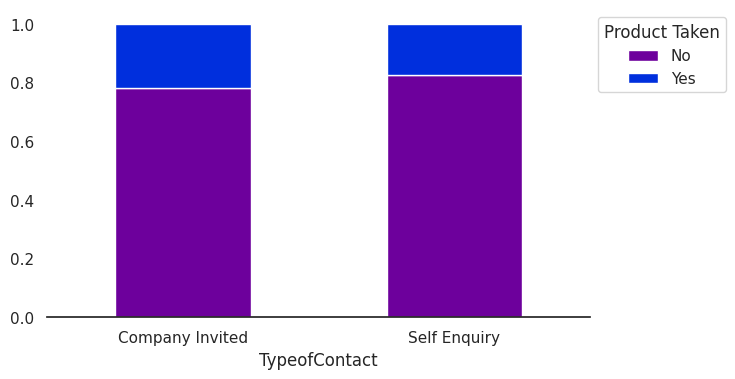

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


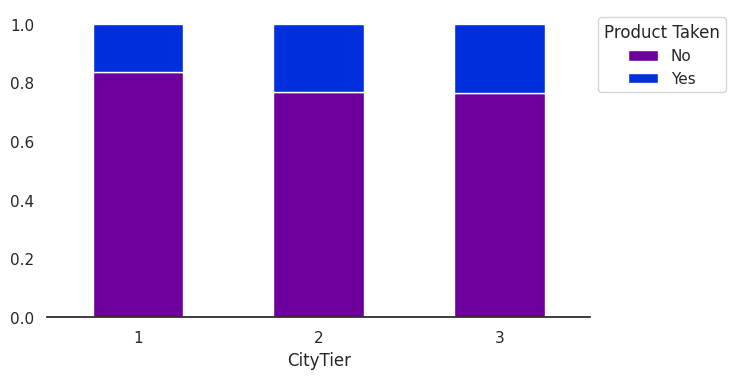

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


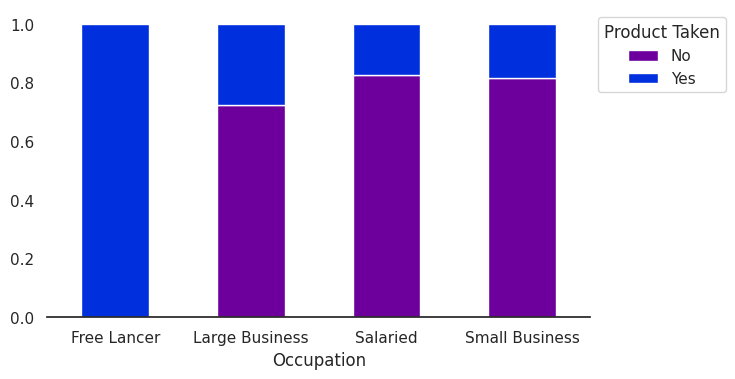

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


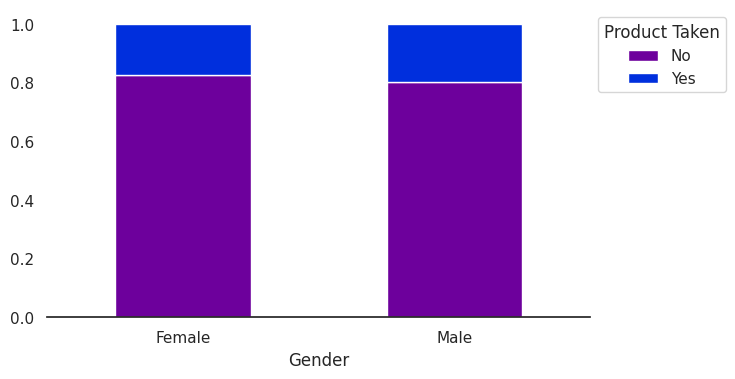

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


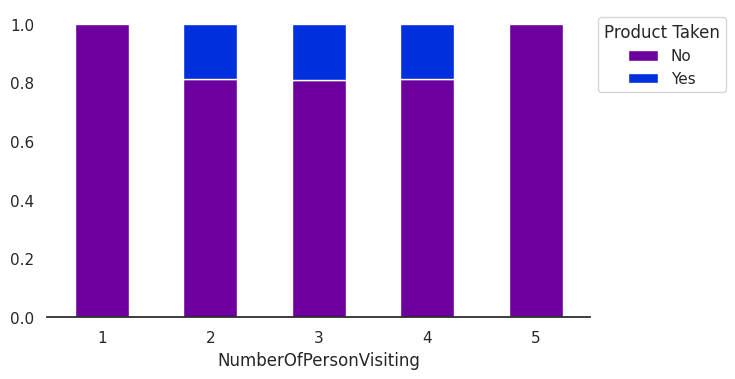

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


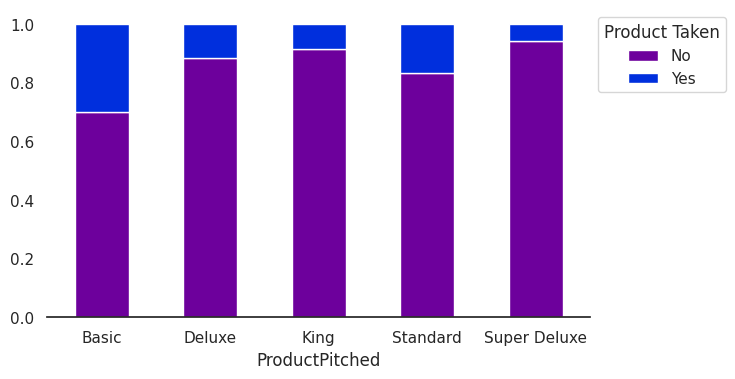

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


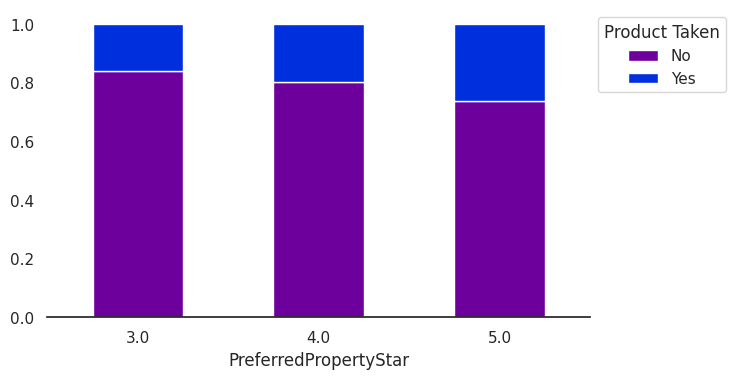

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1186  305  1491
3.0             969  223  1192
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


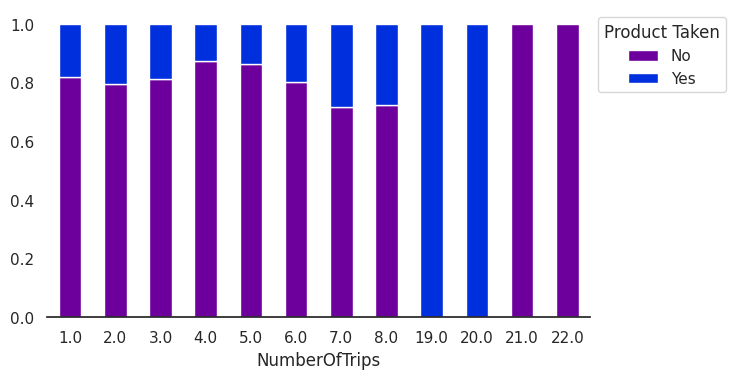

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


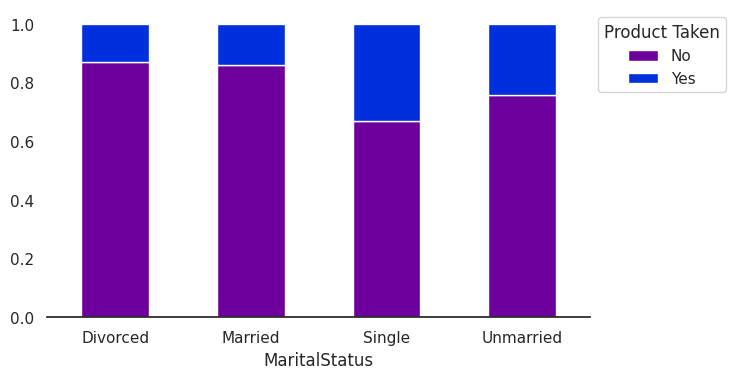

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


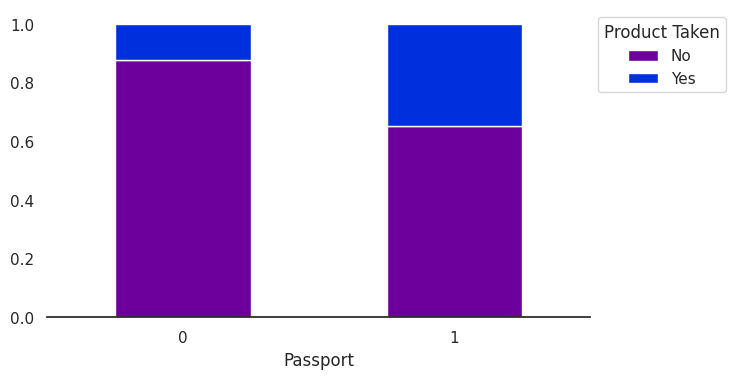

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


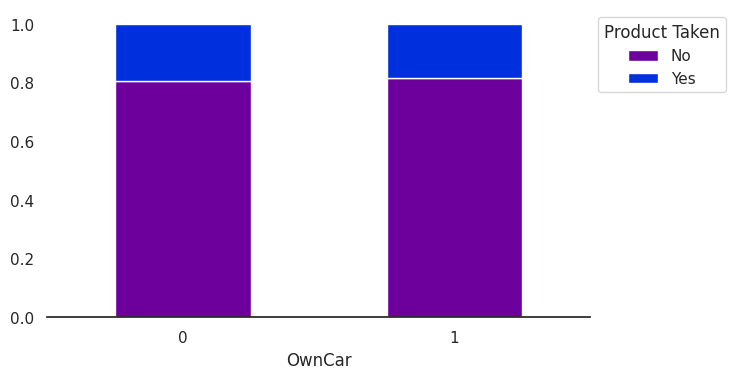

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


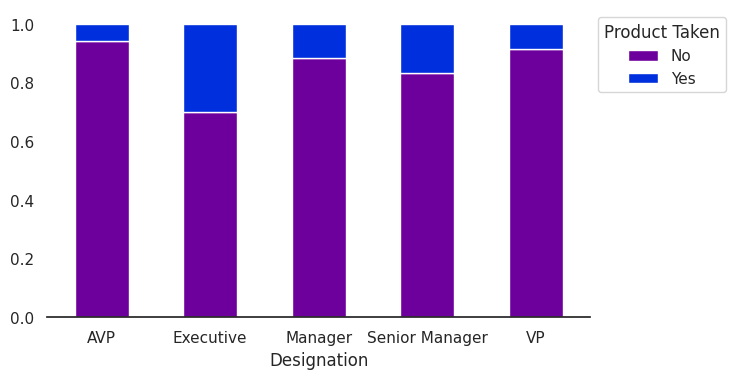

ProdTaken     0    1   All
Agebin                    
15-25       204  143   347
26-30       765  260  1025
31-40      1610  284  1894
41-50       929  144  1073
51-70       460   89   549
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


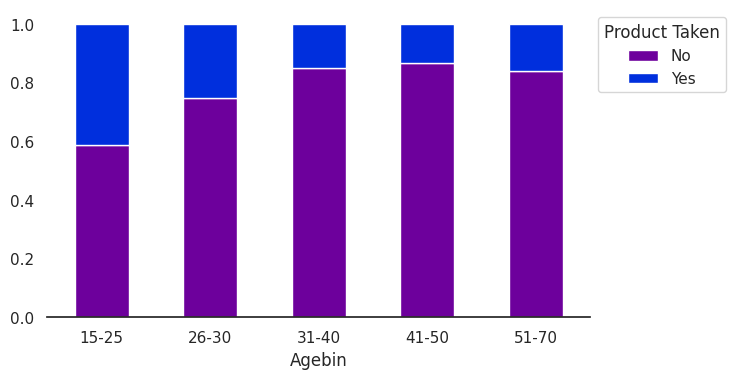

ProdTaken     0    1   All
Incomebin                 
<15000        2    0     2
<20000      754  284  1038
<25000     2031  459  2490
<30000      651  117   768
<35000      343   39   382
<40000      185   21   206
<100000       2    0     2
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


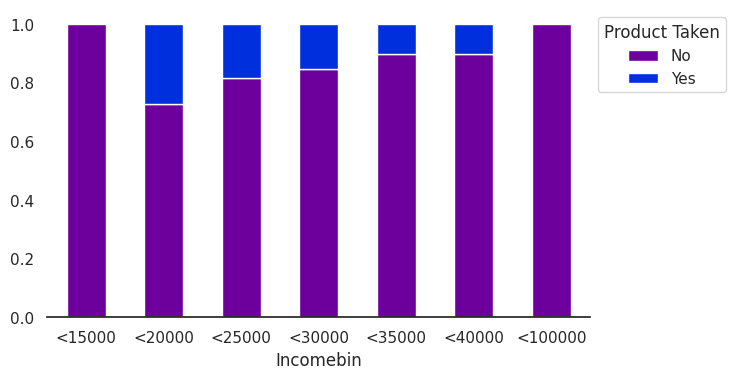

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


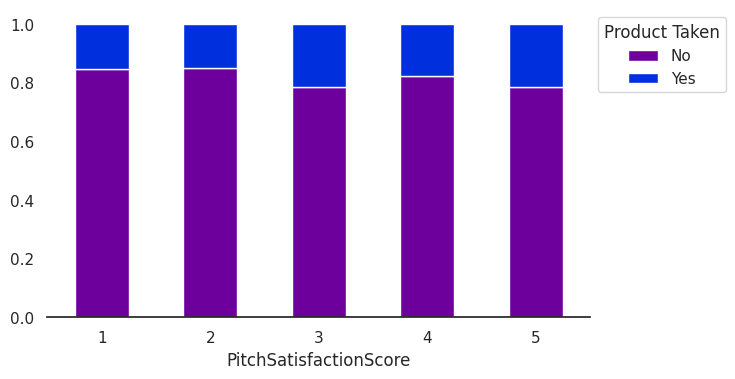

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


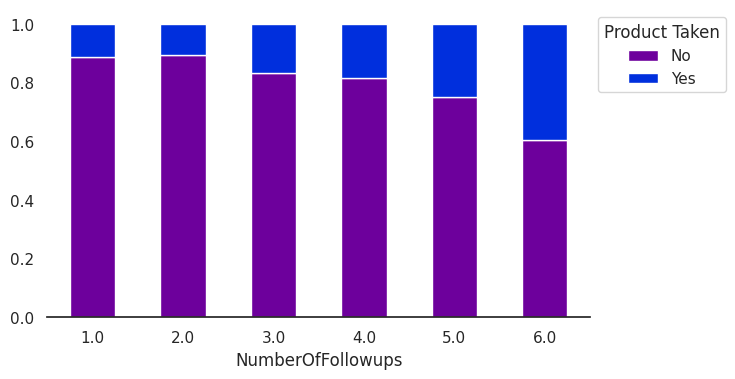

In [79]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Agebin','Incomebin','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(df_tour[variable])

### Customer profile according to product pitched and product purchased
**Basic package :**Most of the customer have Monthly income < 25000, Age is in range of  26-30, Designation as Executive belong to City tier 1, are salaried and single males . Customer contacted the company.Married customers also prefer this basic package.

**Deluxe package:** Most of the customer have Monthly income < 25000, Age is in range of 31-40, Designation as Managers belong to city tier 3 and occupation is small business and married .Customer contacted the company. City tier 1 and divorced customers also preferred this package


**King :** Most of the customer have  Monthly income  in range of  30000-35000, age range in 51-60,  Designation as VP. Belong to city tier 1 and are single female  and  Occupation is small business.Females buy this package more than men.

**SuperDeluxe:** Most of the customer have  Monthly income < 35000, Age is in range 41-50, Designation as AVP,  belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them  were company invited

**Standard package:** Most of the customer have Monthly income  <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.


<h2 style = "font-family:Impact;color:black;font-weight:bold">Insights based on EDA</h2>

- Mostly customer visting with 2,3,4 travellers purchased the product
- Customers who were pitched basic package mostly  brought the product , followed by standard. Reason might be its less expensive.
- Mostly Customers who had passport bought the product.
- Most of the customers who bought the product were Executive and Senior manager
- Customers who were followed up 6 times had purchases the product
* Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier   2,3.
* Customer from 18-25 age purchased the product taken, followed by  26-30.
* Customers who learn from 15000-20000 purchased product followed by customers in income range 20000-25000.
* FreeLancers(need more data to conclude) and Large Business owners have higher chance of purchasing the travel package
* Single and unmarried people has higher chance of purchasing the travel package.
* Having a passport increased chances of purchasing the package.
* Customers who took 7/8 trips had higher chances of purchaing the packages
* Gender,number of children visiting, having a car seemed to be insignificant.
* Customers mostly purchased the travel package when marketing team did high number of followups,higher duration of pitch , and pitched Basic product.


[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Outlier Detection</h2>

In [80]:
Q1 = df_tour.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_tour.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [81]:
((df_tour.select_dtypes(include=['float64','int64'])<lower) | (df_tour.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_tour)*100

Age                        0.00000
DurationOfPitch            2.29133
NumberOfPersonVisiting     0.06137
NumberOfFollowups          6.38298
PreferredPropertyStar      0.00000
NumberOfTrips              2.22995
PitchSatisfactionScore     0.00000
NumberOfChildrenVisiting   0.00000
MonthlyIncome              7.52864
dtype: float64

 Since customer interaction data will not be available for potential customers and new customers,outliers in  Number of trips and Monthly Income  needs to be handled

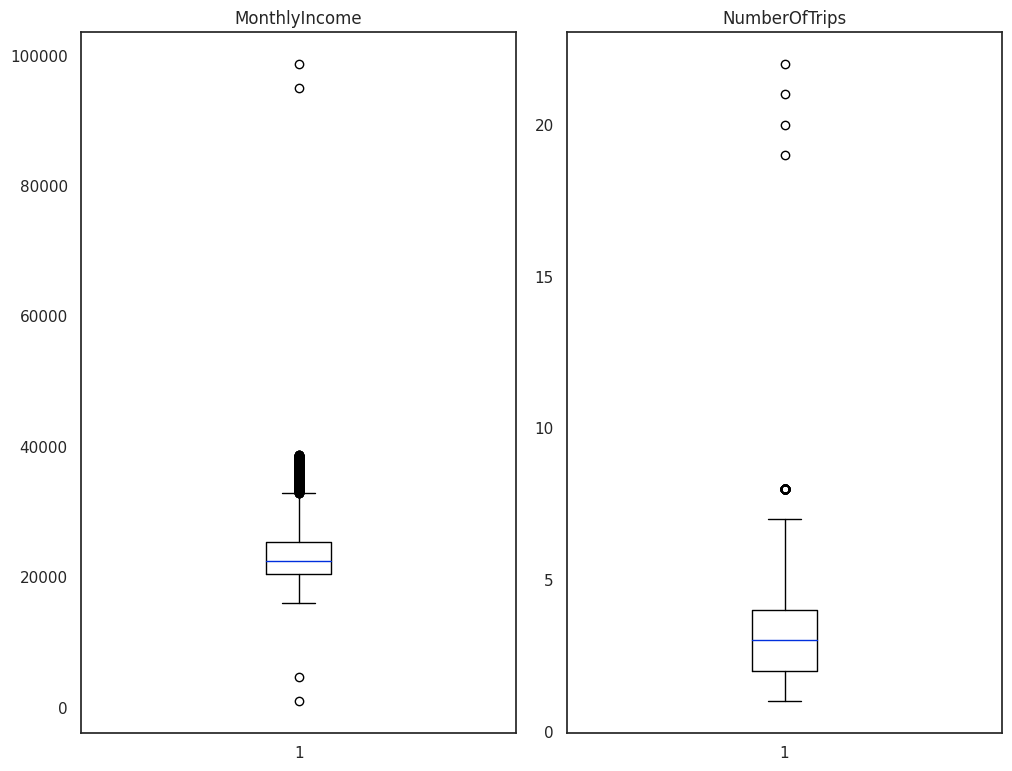

In [82]:
numeric_columns = ['MonthlyIncome','NumberOfTrips']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_tour[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [83]:
# Check MonthlyIncome extreme values
df_tour.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
2482,0,37.00000,Self Enquiry,1,12.00000,Salaried,Female,3,5.00000,Basic,...,Divorced,2.00000,1,2,1,1.00000,Executive,98678.00000,31-40,<100000
38,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,Basic,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
2634,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,King,...,Divorced,2.00000,0,2,1,2.00000,VP,38677.00000,51-70,<40000
4104,0,53.00000,Self Enquiry,1,7.00000,Salaried,Male,4,5.00000,King,...,Married,2.00000,0,1,1,3.00000,VP,38677.00000,51-70,<40000
3190,0,42.00000,Company Invited,1,14.00000,Salaried,Female,3,6.00000,King,...,Married,3.00000,0,4,1,1.00000,VP,38651.00000,41-50,<40000


In [84]:
# Check NumberOfTrips extreme values
df_tour.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
3260,0,40.00000,Company Invited,1,16.00000,Salaried,Male,4,4.00000,Deluxe,...,Unmarried,22.00000,0,2,1,1.00000,Manager,25460.00000,31-40,<30000
816,0,39.00000,Company Invited,1,15.00000,Salaried,Male,3,3.00000,Deluxe,...,Unmarried,21.00000,0,2,1,0.00000,Manager,21782.00000,31-40,<25000
2829,1,31.00000,Company Invited,1,11.00000,Large Business,Male,3,4.00000,Basic,...,Single,20.00000,1,4,1,2.00000,Executive,20963.00000,26-30,<25000
385,1,30.00000,Company Invited,1,10.00000,Large Business,Male,2,3.00000,Basic,...,Single,19.00000,1,4,1,1.00000,Executive,17285.00000,26-30,<20000
3155,1,30.00000,Self Enquiry,1,17.00000,Salaried,Female,4,5.00000,Basic,...,Single,8.00000,1,5,1,2.00000,Executive,21082.00000,26-30,<25000


 We can see that there are just four observations with number of trips 19 or greater

In [85]:
df_tour[(df_tour.MonthlyIncome>40000) | (df_tour.MonthlyIncome<12000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
38,0,36.00000,Self Enquiry,1,11.00000,Salaried,Female,2,4.00000,Basic,...,Divorced,1.00000,1,2,1,0.00000,Executive,95000.00000,31-40,<100000
142,0,38.00000,Self Enquiry,1,9.00000,Large Business,Female,2,3.00000,Deluxe,...,Single,4.00000,1,5,0,0.00000,Manager,1000.00000,31-40,<15000
2482,0,37.00000,Self Enquiry,1,12.00000,Salaried,Female,3,5.00000,Basic,...,Divorced,2.00000,1,2,1,1.00000,Executive,98678.00000,31-40,<100000
2586,0,39.00000,Self Enquiry,1,10.00000,Large Business,Female,3,4.00000,Deluxe,...,Single,5.00000,1,5,0,1.00000,Manager,4678.00000,31-40,<15000


**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [86]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df_tour.drop(index=df_tour[df_tour.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df_tour.drop(index=df_tour[(df_tour.MonthlyIncome>40000) | (df_tour.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
df_tour.drop(index=df_tour[df_tour.NumberOfTrips>10].index,inplace=True)

[Top](#Table-of-Contents)

### Split the dataset

* Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* For that we will use the `stratify` parameter in the train_test_split function.
* Since customer interaction data will not be available for potential customers who will purchase newly introduced travel package  ,so we will drop those variables from our data for modelling.

In [87]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   category
 1   Age                       4878 non-null   float64 
 2   TypeofContact             4878 non-null   category
 3   CityTier                  4878 non-null   category
 4   DurationOfPitch           4878 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   category
 7   NumberOfPersonVisiting    4878 non-null   int64   
 8   NumberOfFollowups         4878 non-null   float64 
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4878 non-null   float64 
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4878 non-null   float64 
 13  Passport                  4878 non-null   catego

Based on the information provided, i assume that Customer interaction data will not be available
for new and potiental customers so dropping columns related to customer interaction

In [88]:
# Separating target column
X = df_tour.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df_tour['ProdTaken']

In [89]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3414, 22), (1464, 22))

In [90]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)

    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [91]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[]
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True:
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test")
    return score_list # returning the list with train and test scores

In [92]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Model Building </h2>

 We'll fit Decision Tree and BaggingClassifier and Randomforest  models on the train data and observe their performance.


## Decision Tree

In [93]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.86270,1.00000,0.59783,1.00000,0.64706,1.00000,0.62147


ValueError: ignored

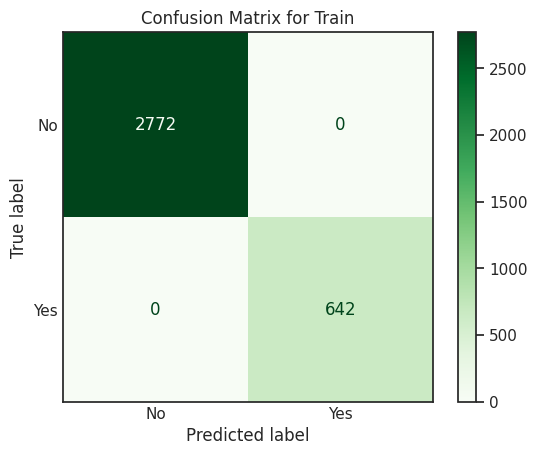

In [95]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

**Observation**

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high


## Bagging classifier

In [96]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1, verbose=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99033,0.88661,0.95327,0.51087,0.99512,0.81977,0.97375,0.62946


ValueError: ignored

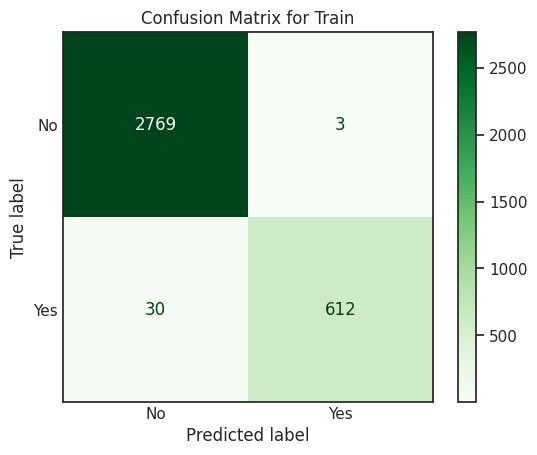

In [97]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

**Observation**

Bagging is  still overfitting the training data , Recall score has decreased for test data

## Random Forest

In [98]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.00000,0.88730,1.00000,0.48551,1.00000,0.85350,1.00000,0.61894


ValueError: ignored

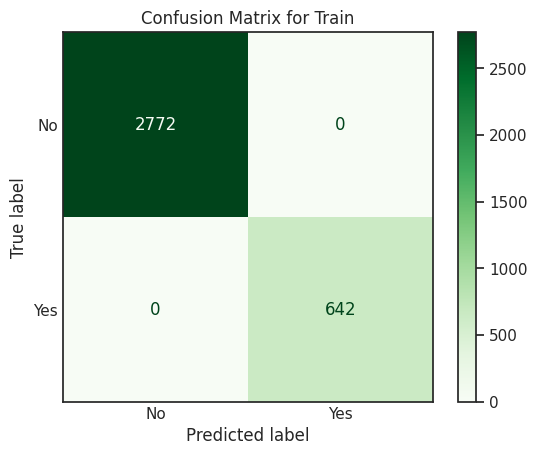

In [111]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

Random forest  is also overfitting the traning data

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Model Performance Evaluation and Improvement-Bagging</h2>

In [112]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  })

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

ValueError: ignored

## Tuning Decision Tree

In [113]:
#Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15],
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]

             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.78559,0.76639,0.68069,0.66304,0.45332,0.42361,0.54421,0.51695


ValueError: ignored

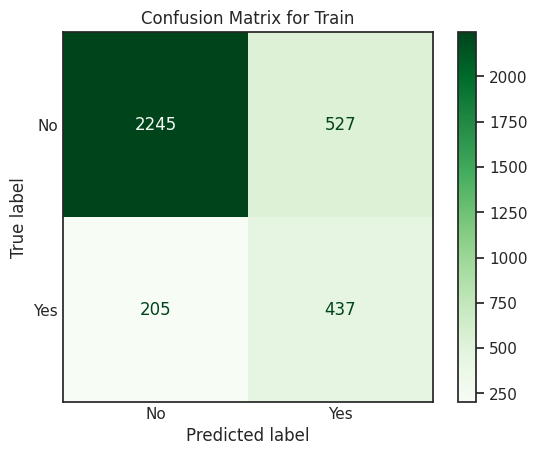

In [114]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

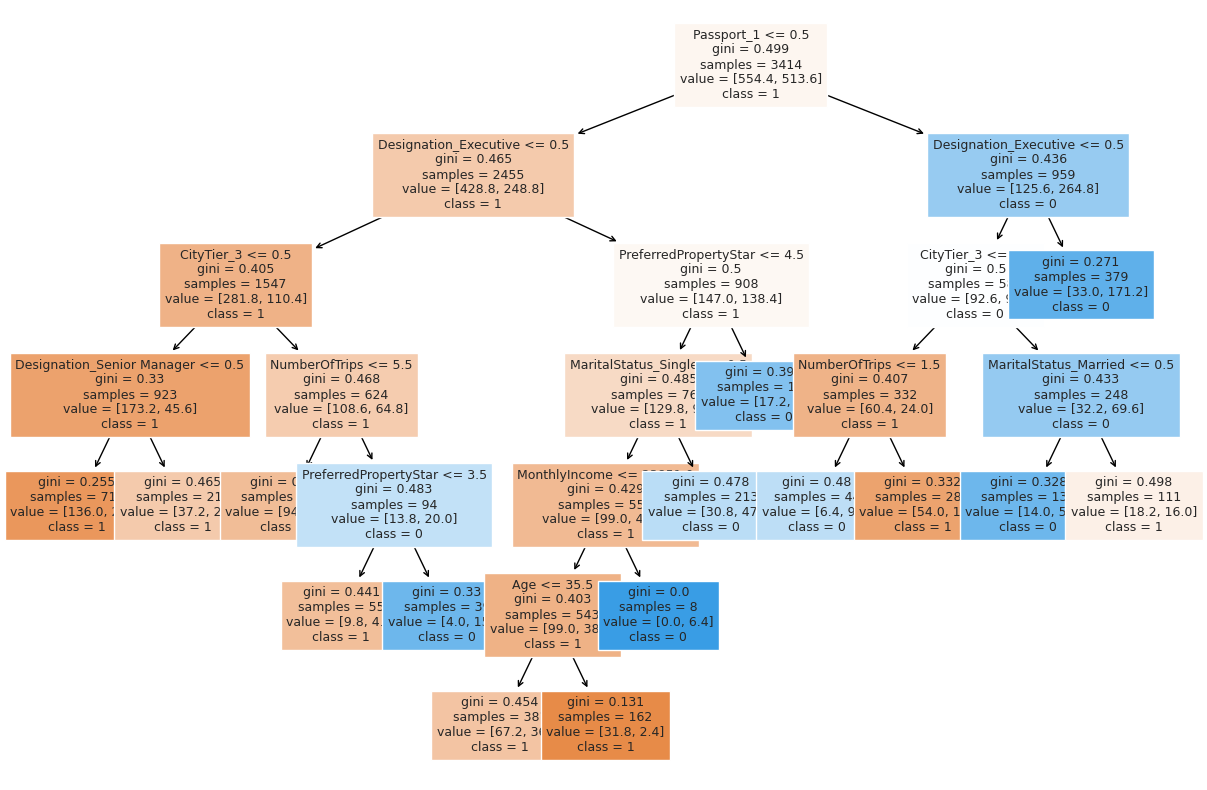

In [115]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [116]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport_1                 0.31385
Designation_Executive      0.23321
CityTier_3                 0.13094
PreferredPropertyStar      0.08738
MaritalStatus_Single       0.05706
NumberOfTrips              0.05188
MonthlyIncome              0.04156
MaritalStatus_Married      0.03142
Designation_Senior Manager 0.02659
Age                        0.02611
Designation_Manager        0.00000
OwnCar_1                   0.00000
MaritalStatus_Unmarried    0.00000
Occupation_Small Business  0.00000
Gender_Male                0.00000
NumberOfPersonVisiting     0.00000
Occupation_Salaried        0.00000
Occupation_Large Business  0.00000
CityTier_2                 0.00000
TypeofContact_Self Enquiry 0.00000
NumberOfChildrenVisiting   0.00000
Designation_VP             0.00000


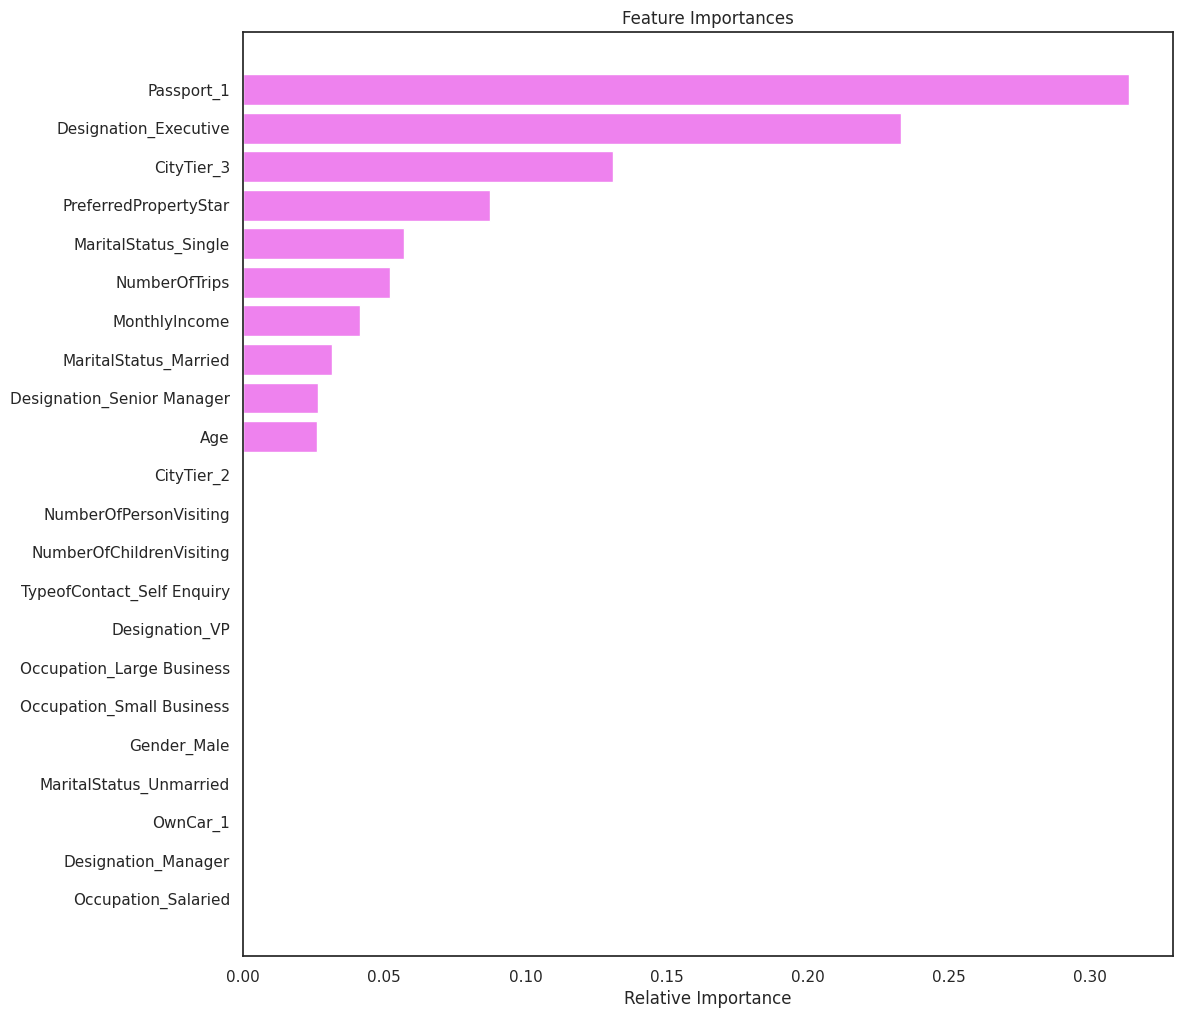

In [117]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Most Important features are passport , Desgination as Executive,City tier 3.

### Tuning Random Forest

In [118]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150],
#               "max_depth": [1,2,3],
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [120]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt)

NotFittedError: ignored

In [119]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

NotFittedError: ignored

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Important features are Passport,Monthly Income,Age, designation executive.

### Tuning Bagging Classifier

In [121]:
# Choose the type of classifier.

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                 1: 0.8},
                                                   random_state=1),
                  max_features=0.8, max_samples=0.9, n_estimators=40,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99854,0.88934,0.99221,0.46739,1.00000,0.89583,0.99609,0.61429


ValueError: ignored

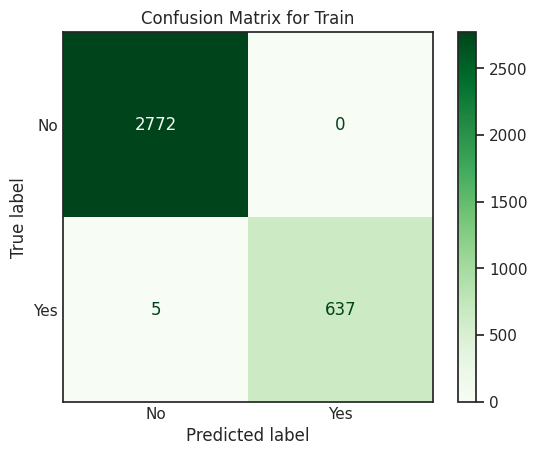

In [122]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  })

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Model Building Boosting</h2>

# Adaboost

In [101]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)


AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.84593,0.84563,0.30374,0.28623,0.71168,0.73148,0.42576,0.41146


ValueError: ignored

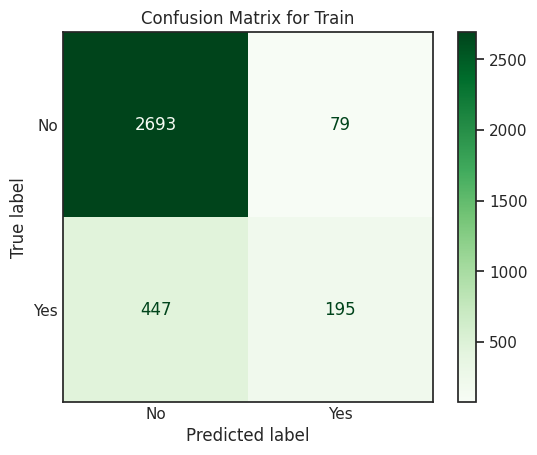

In [102]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

## Gradient Boost

In [103]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.87961,0.86134,0.45016,0.38406,0.83285,0.76259,0.58443,0.51084


ValueError: ignored

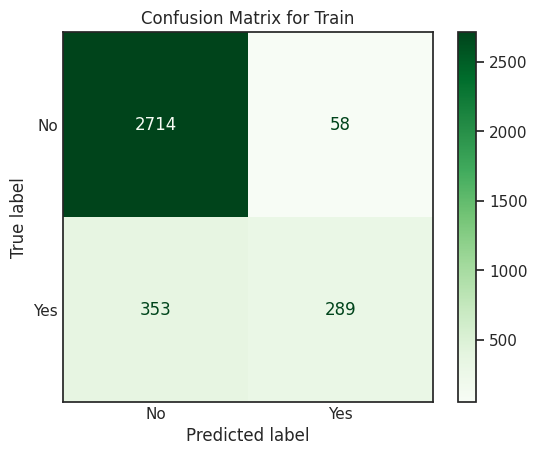

In [104]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

## XGBoost

In [106]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.99531,0.89003,0.97508,0.55797,1.00000,0.79793,0.98738,0.65672


ValueError: ignored

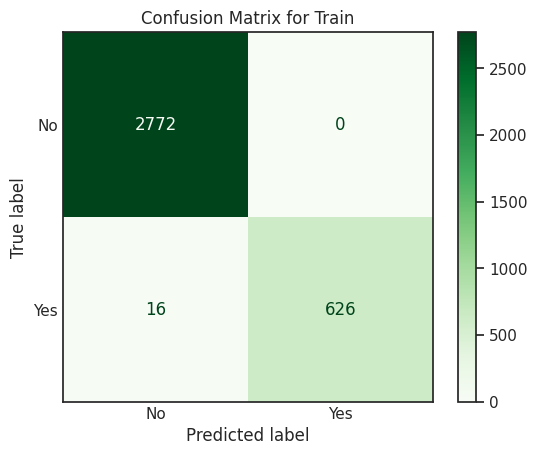

In [109]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

In [123]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Designation_Executive      0.19272
Passport_1                 0.10137
CityTier_3                 0.06134
MaritalStatus_Unmarried    0.05306
MaritalStatus_Single       0.05169
TypeofContact_Self Enquiry 0.04979
Occupation_Large Business  0.04821
PreferredPropertyStar      0.04246
NumberOfTrips              0.03685
Designation_Senior Manager 0.03555
MaritalStatus_Married      0.03540
Age                        0.03488
Gender_Male                0.03235
CityTier_2                 0.03195
MonthlyIncome              0.02822
Occupation_Small Business  0.02735
NumberOfPersonVisiting     0.02626
Designation_Manager        0.02608
NumberOfChildrenVisiting   0.02314
Occupation_Salaried        0.02313
OwnCar_1                   0.02285
Designation_VP             0.01536


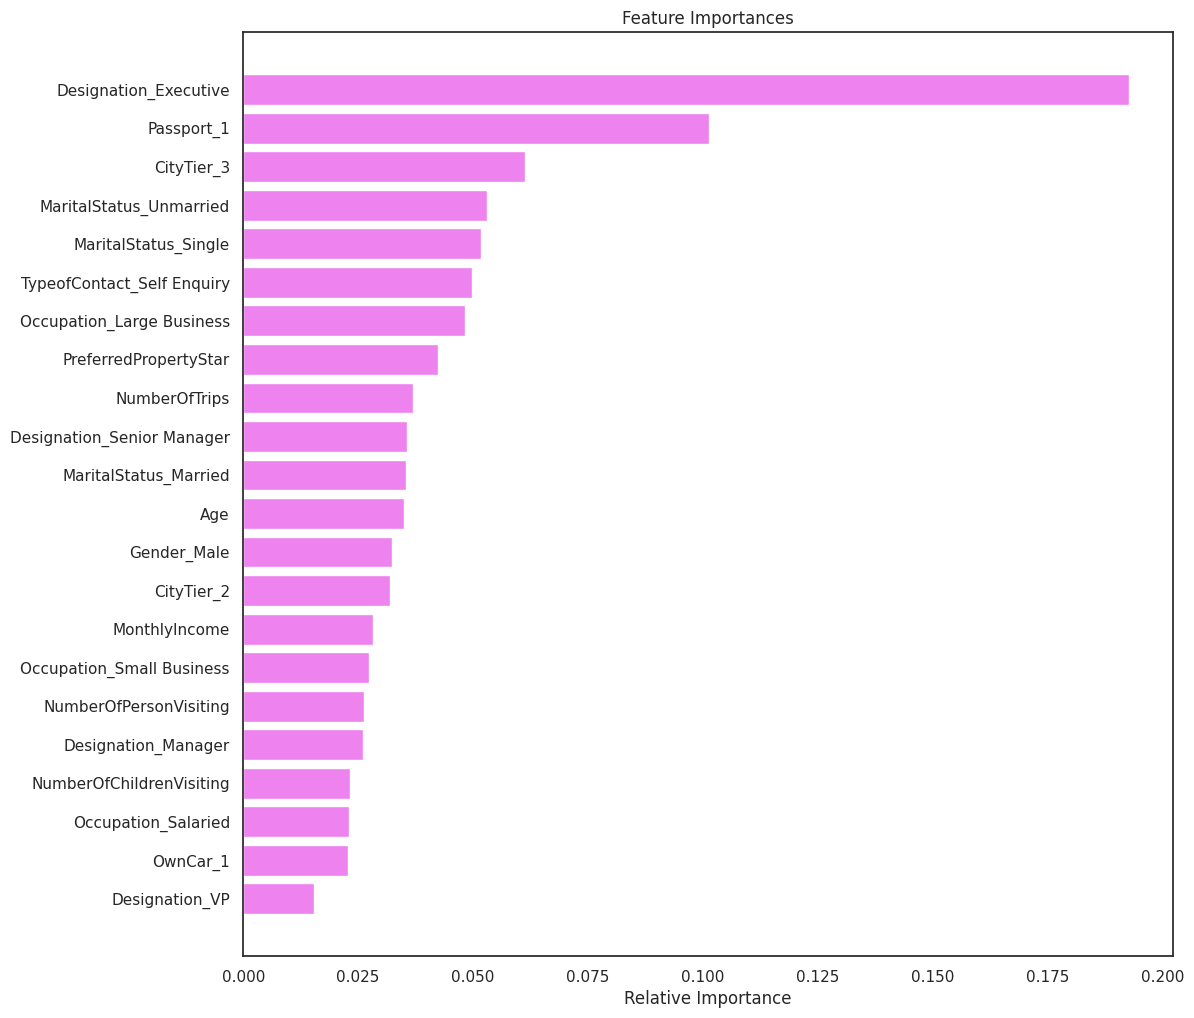

In [124]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2 style = "font-family:Impact;color:black;font-weight:bold">Model Performance Evaluation and Improvement-Boosting</h2>

In [125]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  })

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

ValueError: ignored

### Tuned XGBoost Classifier

In [107]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.92882,0.84016,0.94393,0.71739,0.74539,0.55932,0.83299,0.62857


ValueError: ignored

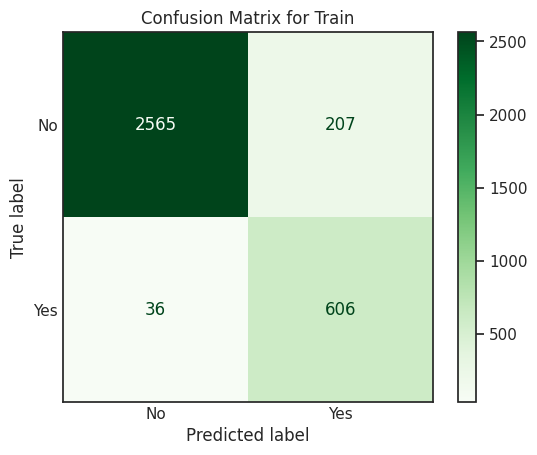

In [108]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)


In [128]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport_1                 0.18117
Designation_Executive      0.14582
CityTier_3                 0.06181
MaritalStatus_Married      0.05525
MaritalStatus_Single       0.05151
Designation_Senior Manager 0.04797
PreferredPropertyStar      0.04189
Designation_Manager        0.03559
MaritalStatus_Unmarried    0.03515
NumberOfTrips              0.03327
Age                        0.03304
MonthlyIncome              0.03252
CityTier_2                 0.03078
Occupation_Large Business  0.03033
Gender_Male                0.02905
TypeofContact_Self Enquiry 0.02811
Occupation_Salaried        0.02530
Occupation_Small Business  0.02312
Designation_VP             0.02184
NumberOfPersonVisiting     0.02162
OwnCar_1                   0.01883
NumberOfChildrenVisiting   0.01604


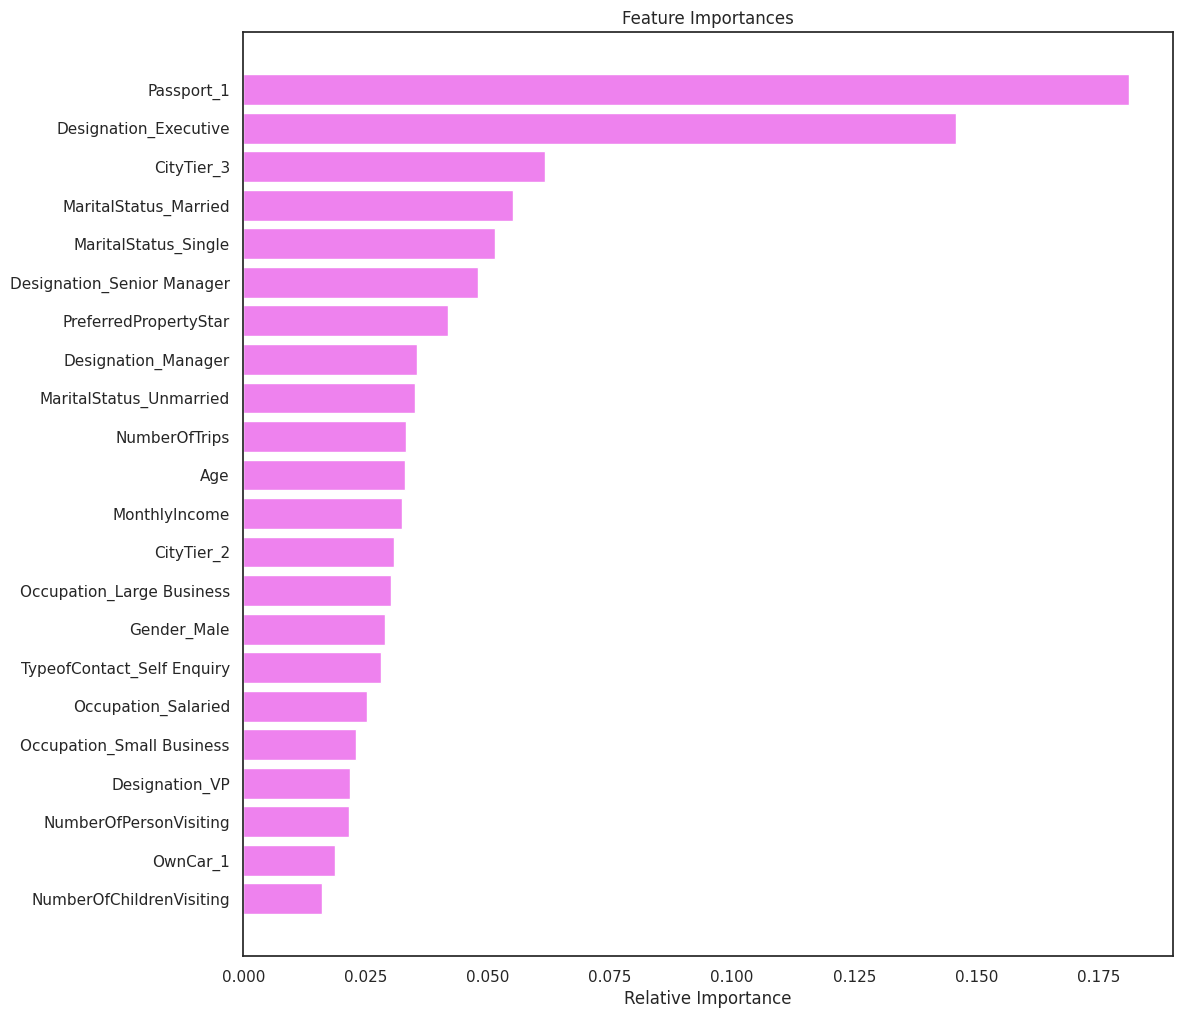

In [129]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Stacking Classifier</h2>

**Now, let's build a stacking model with the tuned models - decision tree, random forest,Adaboosting and gradient boosting, then use XGBoost to get the final prediction.**

In [130]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),('AdaBoost',abc_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

NameError: ignored

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)

In [ ]:
add_score_model(stacking_estimator)

## Comparing all models

In [131]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          'Tuned AdaBoost',
                                          'Tuned Gradient Boost',
                                          'Tuned XGboost','Stacking'
                                          ],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  })

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

ValueError: ignored

**Observations**

* Tuned Decision Tree  gives a more generalized model.
* XGboost seems to overfit. To get more generalized model, we can be look into tuning  XGboost with different parameters.
* we can also tune stacking with different weak learners which can help improve the performance and get a generalized model.


[Top](#Table-of-Contents)

## Conclusion


-  Looking at feature importance
    Designation , Passport, Tier city , martial status,occupation are most important features.Income can also be looked into, few of other models have given higher importance to Income as well.
- Gender,number of children visiting, having a car seemed to be insignificant.
    

<h2 style = "font-family:Impact;color:black;font-weight:bold">Business Recommendations & Insights</h2>

We have been able to build a predictive model:

a) that the company can deploy to identify customers who will be interested in purchasing the Travel package.

b) that the company  can use to find the key factors that will have an impact on a customer taking a product or not.

- Most important features that have an impact on Product taken: Desgination, Passport,TierCity,Martialstatus,occupation

- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
- Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package  are:
  - Having a higher duration of pitch by salesman to the customer.
  - Getting a PitchSatisfactionScore of 3 or 5.
  - Having multiple follow ups with the customers.
- Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
- Mostly Single customers are accpeting a package , reason may be married couples might has kids , provding a property , with child care services can get married couples to accept the product.